<a href="https://colab.research.google.com/github/Kanchan786786/Capstone_project-/blob/main/AAPLdata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ARIMA

In [157]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
# from pmdarima import auto_arima
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=pd.errors.SettingWithCopyWarning)
# Suppress warnings
warnings.filterwarnings("ignore", category=Warning)



df = pd.read_csv("https://raw.githubusercontent.com/Kanchan786786/Capstone_project-/refs/heads/main/aapl_scaled.csv")

In [158]:

df.head()


,Date,Day,Close,High,Low,Open,Volume,VWAP,Adjusted_Close,Market_Cap,Bid_Date,Ask_Date,SMA_50,EMA_50,RSI,MACD,MACD_Signal,MACD_Hist,Tomorrow
0,2000-01-03,1,-0.671968,-0.672324,-0.672963,-0.673016,0.393194,-0.672426,-0.671968,0.0,-2.842171e-14,-5.684342e-14,-0.673419,-0.673757,0.741042,-0.182205,-0.196298,0.005582,-0.673222
1,2000-01-04,3,-0.673132,-0.672551,-0.673029,-0.672605,0.332136,-0.672918,-0.673132,0.0,-2.842171e-14,-5.684342e-14,-0.673335,-0.673723,-0.186780,-0.182942,-0.196298,0.003174,-0.673042
2,2000-01-05,4,-0.672952,-0.672551,-0.672797,-0.673163,1.025500,-0.672787,-0.672952,0.0,-2.842171e-14,-5.684342e-14,-0.673268,-0.673673,-0.073428,-0.182942,-0.196298,0.003174,-0.674139
3,2000-01-06,2,-0.674050,-0.672989,-0.673791,-0.672868,0.998519,-0.673623,-0.674050,0.0,-2.842171e-14,-5.684342e-14,-0.673218,-0.673673,-0.766005,-0.187362,-0.197871,-0.006458,-0.673599
4,2000-01-07,0,-0.673509,-0.673720,-0.673742,-0.674049,0.197493,-0.673673,-0.673509,0.0,-2.842171e-14,-5.684342e-14,-0.673167,-0.673656,-0.416792,-0.188835,-0.198657,-0.008866,-0.673812


In [159]:
import pandas as pd

# Convert 'Date' column to datetime format (if not already)
df['Date'] = pd.to_datetime(df['Date'])

# Get the last 5 years from today
five_years_ago = pd.Timestamp.today() - pd.DateOffset(years=5)

# Filter data
df = df[df['Date'] >= five_years_ago]
df.head().T

,5100,5101,5102,5103,5104
Date,2020-04-13 00:00:00,2020-04-14 00:00:00,2020-04-15 00:00:00,2020-04-16 00:00:00,2020-04-17 00:00:00
Day,1,3,4,2,0
Close,0.40221,0.457163,0.446723,0.455721,0.440233
High,0.393556,0.450952,0.443385,0.450757,0.445821
Low,0.384216,0.433401,0.443788,0.450712,0.428613
Open,0.383508,0.430104,0.439669,0.459521,0.448791
Volume,-0.662124,-0.495337,-0.661781,-0.59407,-0.442528
VWAP,0.393364,0.447243,0.444636,0.452408,0.438291
Adjusted_Close,0.40221,0.457163,0.446723,0.455721,0.440233
Market_Cap,0.0,0.0,0.0,0.0,0.0


In [160]:
print(len(df.columns))


19


In [161]:
# 1. Basic Information
print("\nDataset Information:\n")
print(df.info())

# 2. Summary Statistics
print("\nSummary Statistics:\n")
print(df.describe())

# 3. Checking for Missing Values
print("\nMissing Values:\n")
print(df.isnull().sum())


Dataset Information:

<class 'pandas.core.frame.DataFrame'>
Index: 1207 entries, 5100 to 6306
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            1207 non-null   datetime64[ns]
 1   Day             1207 non-null   int64         
 2   Close           1207 non-null   float64       
 3   High            1207 non-null   float64       
 4   Low             1207 non-null   float64       
 5   Open            1207 non-null   float64       
 6   Volume          1207 non-null   float64       
 7   VWAP            1207 non-null   float64       
 8   Adjusted_Close  1207 non-null   float64       
 9   Market_Cap      1207 non-null   float64       
 10  Bid_Date        1207 non-null   float64       
 11  Ask_Date        1207 non-null   float64       
 12  SMA_50          1207 non-null   float64       
 13  EMA_50          1207 non-null   float64       
 14  RSI             1207 non-null   flo

In [162]:
# 4. Checking for Duplicates
print(f"\nNumber of duplicate rows: {df.duplicated().sum()}")


Number of duplicate rows: 0


In [163]:
# Rename columns
new_columns = {col: col.replace(' ', '_').replace('Price', 'Date').replace('Week_Date', 'Day') for col in df.columns}
df = df.rename(columns=new_columns)

<Axes: xlabel='Date'>

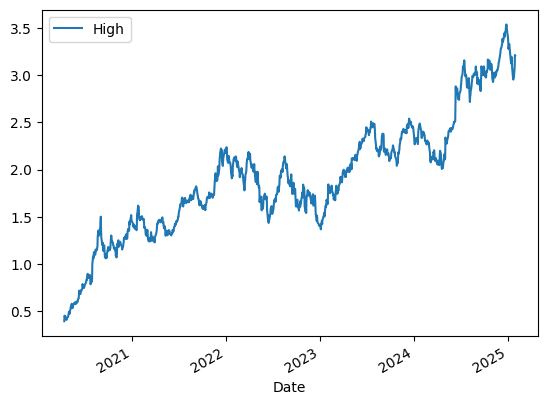

In [164]:
df.plot.line(y="High", use_index=True, x='Date')


In [165]:
df = df.dropna()  # Drop rows with NaN values


In [166]:
print(df.columns)


Index(['Date', 'Day', 'Close', 'High', 'Low', 'Open', 'Volume', 'VWAP',
       'Adjusted_Close', 'Market_Cap', 'Bid_Date', 'Ask_Date', 'SMA_50',
       'EMA_50', 'RSI', 'MACD', 'MACD_Signal', 'MACD_Hist', 'Tomorrow'],
      dtype='object')


In [167]:
import pandas as pd

# Lag Features
df['Close_Lag1'] = df['Close'].shift(1)
df['Close_Lag2'] = df['Close'].shift(2)
df['Close_Lag3'] = df['Close'].shift(3)
df['RSI_Lag1'] = df['RSI'].shift(1)
df['MACD_Lag1'] = df['MACD'].shift(1)

# Rolling Statistics
df['Rolling_Mean_7'] = df['Close'].rolling(window=7).mean()
df['Rolling_Std_7'] = df['Close'].rolling(window=7).std()
df['Rolling_Mean_30'] = df['Close'].rolling(window=30).mean()
df['Rolling_Std_30'] = df['Close'].rolling(window=30).std()

# Price Change Indicators
df['Daily_Return'] = df['Close'].pct_change()
df['High_Low_Percent'] = (df['High'] - df['Low']) / df['Low'] * 100
df['Open_Close_Diff'] = df['Close'] - df['Open']

# Moving Averages
df['SMA_200'] = df['Close'].rolling(window=200).mean()
df['EMA_100'] = df['Close'].ewm(span=100, adjust=False).mean()

# ATR Calculation (Fixed)
df['Close_Shift1'] = df['Close'].shift(1)
df['ATR'] = df.apply(lambda x: max(x['High'] - x['Low'],
                                   abs(x['High'] - x['Close_Shift1']),
                                   abs(x['Low'] - x['Close_Shift1'])), axis=1)
df.drop(columns=['Close_Shift1'], inplace=True)

# Volume-Related Features
df['Volume_SMA_7'] = df['Volume'].rolling(window=7).mean()
df['Volume_Ratio'] = df['Volume'] / df['Volume_SMA_7']

# Time-Based Features
df['Bid_Date'] = pd.to_datetime(df['Bid_Date'])  # Ensure Date is in datetime format
df['Day_of_Week'] = df['Bid_Date'].dt.dayofweek
df['Month'] = df['Bid_Date'].dt.month
df['Year'] = df['Bid_Date'].dt.year

# Stochastic Oscillator
df['Stochastic_Oscillator'] = (df['Close'] - df['Low'].rolling(window=14).min()) / (df['High'].rolling(window=14).max() - df['Low'].rolling(window=14).min())

# Z-Score Normalization (Fixed)
df['Close_ZScore'] = (df['Close'] - df['Close'].mean()) / df['Close'].std()

# Handle NaN values
#df.dropna(inplace=True)  # OR df.fillna(0, inplace=True)

In [168]:
df.tail().T


,6302,6303,6304,6305,6306
Date,2025-01-23 00:00:00,2025-01-24 00:00:00,2025-01-27 00:00:00,2025-01-28 00:00:00,2025-01-29 00:00:00
Day,2,0,1,3,4
Close,2.979816,2.965393,3.081429,3.219098,3.237126
High,3.000103,2.977372,3.083234,3.213775,3.208417
Low,2.996981,2.982237,3.024811,3.137958,3.190969
Open,3.001314,3.001971,2.989501,3.101561,3.155211
Volume,-0.846681,-0.861116,-0.756398,-0.80634,-0.885421
VWAP,2.992378,2.975047,3.063424,3.190612,3.212305
Adjusted_Close,2.979816,2.965393,3.081429,3.219098,3.237126
Market_Cap,0.0,0.0,0.0,0.0,0.0


In [169]:
print(df.columns)


Index(['Date', 'Day', 'Close', 'High', 'Low', 'Open', 'Volume', 'VWAP',
       'Adjusted_Close', 'Market_Cap', 'Bid_Date', 'Ask_Date', 'SMA_50',
       'EMA_50', 'RSI', 'MACD', 'MACD_Signal', 'MACD_Hist', 'Tomorrow',
       'Close_Lag1', 'Close_Lag2', 'Close_Lag3', 'RSI_Lag1', 'MACD_Lag1',
       'Rolling_Mean_7', 'Rolling_Std_7', 'Rolling_Mean_30', 'Rolling_Std_30',
       'Daily_Return', 'High_Low_Percent', 'Open_Close_Diff', 'SMA_200',
       'EMA_100', 'ATR', 'Volume_SMA_7', 'Volume_Ratio', 'Day_of_Week',
       'Month', 'Year', 'Stochastic_Oscillator', 'Close_ZScore'],
      dtype='object')


In [170]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['High'].dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])

if result[1] > 0.05:
    print("The data is non-stationary; consider differencing.")
else:
    print("The data is stationary.")

ADF Statistic: -1.4393092527217448
p-value: 0.5632925256540824
The data is non-stationary; consider differencing.


In [171]:
df['High_Diff1'] = df['High'] - df['High'].shift(1)  # First-order differencing


In [172]:
df['High_Log'] = np.log(df['High'])


In [173]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# First-order differencing
df['High_Diff1'] = df['High'] - df['High'].shift(1)

# ADF test after first-order differencing
result_diff1 = adfuller(df['High_Diff1'].dropna())
print('ADF Statistic (Diff1):', result_diff1[0])
print('p-value (Diff1):', result_diff1[1])

if result_diff1[1] > 0.05:
    print("Still non-stationary, apply second differencing.")
else:
    print("Now the data is stationary.")

ADF Statistic (Diff1): -24.156700175154597
p-value (Diff1): 0.0
Now the data is stationary.


In [174]:
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]
# Handle NaN values
df.dropna(inplace=True)

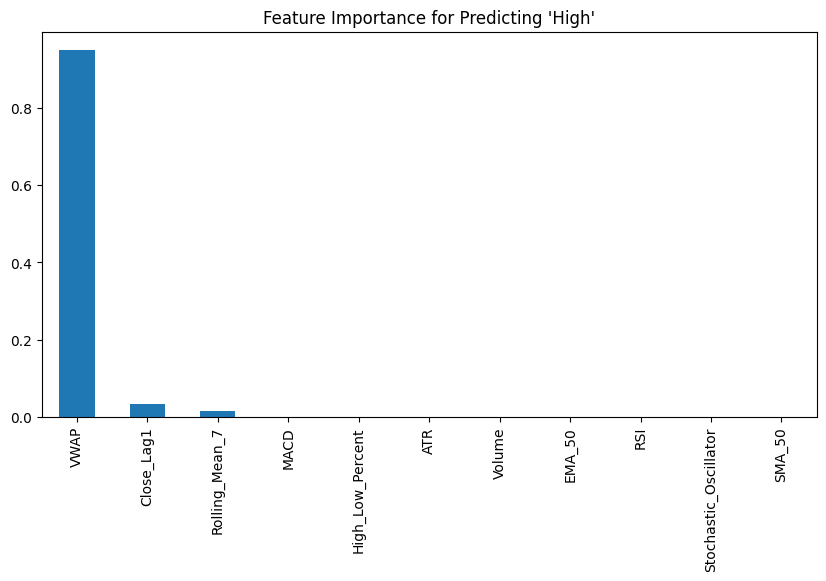

In [175]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import StandardScaler

# Ensure the index is datetime
df['Date'] = pd.to_datetime(df['Date'])  # Convert Date column to datetime
df.set_index('Date', inplace=True)       # Set Date as index

# Drop NaNs and align indices
df = df.dropna(subset=['High_Diff1', 'RSI', 'MACD', 'Volume'])

# Select features (Removing SMA_50 as it was not significant)
exog_features = df[['RSI', 'MACD', 'Volume', 'VWAP', 'SMA_50', 'EMA_50', 'ATR',
                     'Stochastic_Oscillator', 'Close_Lag1', 'Rolling_Mean_7', 'High_Low_Percent']]

# Normalize exogenous features
scaler = StandardScaler()
exog_features_scaled = pd.DataFrame(scaler.fit_transform(exog_features),
                                    columns=exog_features.columns,
                                    index=exog_features.index)

# Define the target variable
target = df['High_Diff1']

# Ensure indices are aligned
exog_features_scaled = exog_features_scaled.loc[target.index]
selected_features = ['RSI', 'MACD', 'Volume', 'VWAP', 'SMA_50', 'EMA_50', 'ATR',
                     'Stochastic_Oscillator', 'Close_Lag1', 'Rolling_Mean_7', 'High_Low_Percent']

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(exog_features_scaled, df['High'])

importances = pd.Series(rf.feature_importances_, index=selected_features)
importances.sort_values(ascending=False).plot(kind='bar', figsize=(10, 5))
plt.title("Feature Importance for Predicting 'High'")
plt.show()

In [176]:
corr_matrix = df[['High', 'RSI', 'MACD', 'Volume', 'VWAP', 'SMA_50', 'EMA_50', 'ATR',
                  'Stochastic_Oscillator', 'Close_Lag1', 'Rolling_Mean_7', 'High_Low_Percent']].corr()
print(corr_matrix)

                           High       RSI      MACD    Volume      VWAP  \
High                   1.000000  0.251102  0.369248 -0.423239  0.999593   
RSI                    0.251102  1.000000  0.826857 -0.169889  0.259392   
MACD                   0.369248  0.826857  1.000000 -0.185788  0.373272   
Volume                -0.423239 -0.169889 -0.185788  1.000000 -0.437698   
VWAP                   0.999593  0.259392  0.373272 -0.437698  1.000000   
SMA_50                 0.950189 -0.022452  0.072672 -0.409973  0.948974   
EMA_50                 0.966967  0.022418  0.135550 -0.418676  0.965858   
ATR                    0.134521 -0.109551 -0.089814  0.392660  0.118866   
Stochastic_Oscillator  0.149323  0.842508  0.526830 -0.152981  0.158700   
Close_Lag1             0.997864  0.236269  0.369442 -0.436155  0.997633   
Rolling_Mean_7         0.994749  0.187514  0.342940 -0.430578  0.994405   
High_Low_Percent      -0.192208 -0.278757 -0.266868  0.631771 -0.216191   

                        

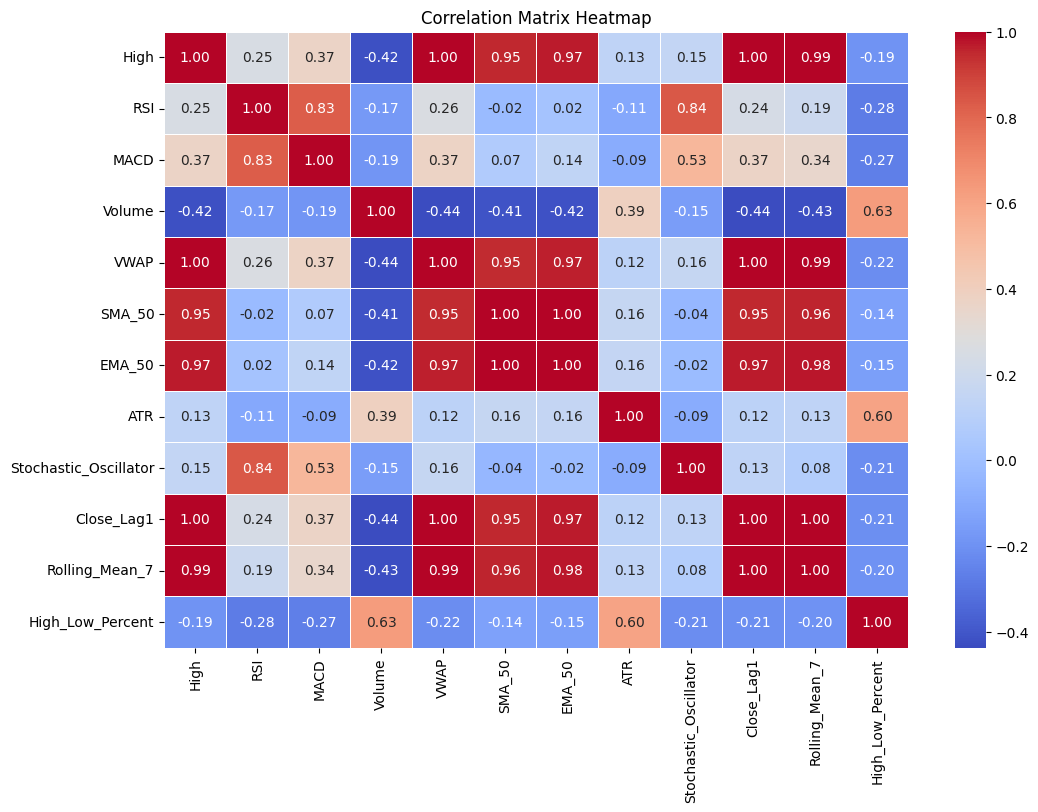

In [177]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix for the selected columns
corr_matrix = df[['High', 'RSI', 'MACD', 'Volume', 'VWAP', 'SMA_50', 'EMA_50', 'ATR',
                  'Stochastic_Oscillator', 'Close_Lag1', 'Rolling_Mean_7', 'High_Low_Percent']].corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))  # Set the figure size
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [178]:
import pandas as pd

# Compute correlation matrix including the target variable
corr_matrix = df[['High', 'RSI', 'MACD', 'Volume', 'VWAP', 'SMA_50', 'EMA_50', 'ATR',
                  'Stochastic_Oscillator', 'Close_Lag1', 'Rolling_Mean_7', 'High_Low_Percent']].corr()

# Get absolute correlation with the target variable 'High'
target_corr = corr_matrix['High'].abs().sort_values(ascending=False)

# Select top 8 features (excluding 'High' itself)
top_features = target_corr.index[1:9]  # Skip index 0 as it's 'High' itself

# Print the filtered correlation matrix for the selected features
filtered_corr_matrix = corr_matrix.loc[top_features, top_features]

# Round values to 3 decimal places for better readability
filtered_corr_matrix = filtered_corr_matrix.round(3)

# Print in a formatted table
print("Filtered Correlation Matrix (Top 8 Features Related to 'High'):\n")
print(filtered_corr_matrix.to_string())

Filtered Correlation Matrix (Top 8 Features Related to 'High'):

                 VWAP  Close_Lag1  Rolling_Mean_7  EMA_50  SMA_50  Volume   MACD    RSI
VWAP            1.000       0.998           0.994   0.966   0.949  -0.438  0.373  0.259
Close_Lag1      0.998       1.000           0.996   0.968   0.951  -0.436  0.369  0.236
Rolling_Mean_7  0.994       0.996           1.000   0.976   0.960  -0.431  0.343  0.188
EMA_50          0.966       0.968           0.976   1.000   0.997  -0.419  0.136  0.022
SMA_50          0.949       0.951           0.960   0.997   1.000  -0.410  0.073 -0.022
Volume         -0.438      -0.436          -0.431  -0.419  -0.410   1.000 -0.186 -0.170
MACD            0.373       0.369           0.343   0.136   0.073  -0.186  1.000  0.827
RSI             0.259       0.236           0.188   0.022  -0.022  -0.170  0.827  1.000


In [179]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import StandardScaler

# exogenous features
exog_features_scaled = df[['RSI', 'MACD','Volume', 'VWAP', 'Close_Lag1', 'Rolling_Mean_7', 'ATR', 'Stochastic_Oscillator']]

# Normalize the exogenous features
scaler = StandardScaler()
exog_features_scaled = pd.DataFrame(scaler.fit_transform(exog_features_scaled),
                                    columns=exog_features_scaled.columns,
                                    index=exog_features_scaled.index)

# Define the target variable
target = df['High_Diff1']

# Train the ARIMAX model (ARIMA with exogenous variables)
model = ARIMA(target,
              order=(2, 1, 2),  # Adjust (p, d, q) as needed
              exog=exog_features_scaled,
              enforce_stationarity=False,
              enforce_invertibility=False)

# Fit the model
results = model.fit()

# Print the summary of the results
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:             High_Diff1   No. Observations:                 1008
Model:                 ARIMA(2, 1, 2)   Log Likelihood                2404.274
Date:                Fri, 11 Apr 2025   AIC                          -4782.548
Time:                        15:49:42   BIC                          -4718.695
Sample:                             0   HQIC                         -4758.284
                               - 1008                                         
Covariance Type:                  opg                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
RSI                       0.0076      0.002      3.251      0.001       0.003       0.012
MACD                     -0.0068      0.001     -4.771      0.000      -0.010      -0.004
Volume  

In [180]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predict on test set
y_pred = results.predict(start=len(target) - 30, end=len(target) - 1, exog=exog_features.iloc[-30:])
y_true = target.iloc[-30:]  # Actual values for test set

# Train set predictions (using fitted values)
y_train_pred = results.fittedvalues  # Predicted values for the training data
y_train_true = target.iloc[:len(y_train_pred)]  # Actual values for the training set

# Evaluation metrics for the test set
mae_test = mean_absolute_error(y_true, y_pred)
mse_test = mean_squared_error(y_true, y_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_true, y_pred)

# Evaluation metrics for the train set
mae_train = mean_absolute_error(y_train_true, y_train_pred)
mse_train = mean_squared_error(y_train_true, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train_true, y_train_pred)

# Print evaluation metrics
print(f"Test Metrics:")
print(f"Test MAE: {mae_test:.4f}")
print(f"Test MSE: {mse_test:.4f}")
print(f"Test RMSE: {rmse_test:.4f}")
print(f"Test R-squared: {r2_test:.4f}")

print(f"\nTrain Metrics:")
print(f"Train MAE: {mae_train:.4f}")
print(f"Train MSE: {mse_train:.4f}")
print(f"Train RMSE: {rmse_train:.4f}")
print(f"Train R-squared: {r2_train:.4f}")

Test Metrics:
Test MAE: 0.0253
Test MSE: 0.0011
Test RMSE: 0.0330
Test R-squared: 0.6794

Train Metrics:
Train MAE: 0.0165
Train MSE: 0.0005
Train RMSE: 0.0221
Train R-squared: 0.7025


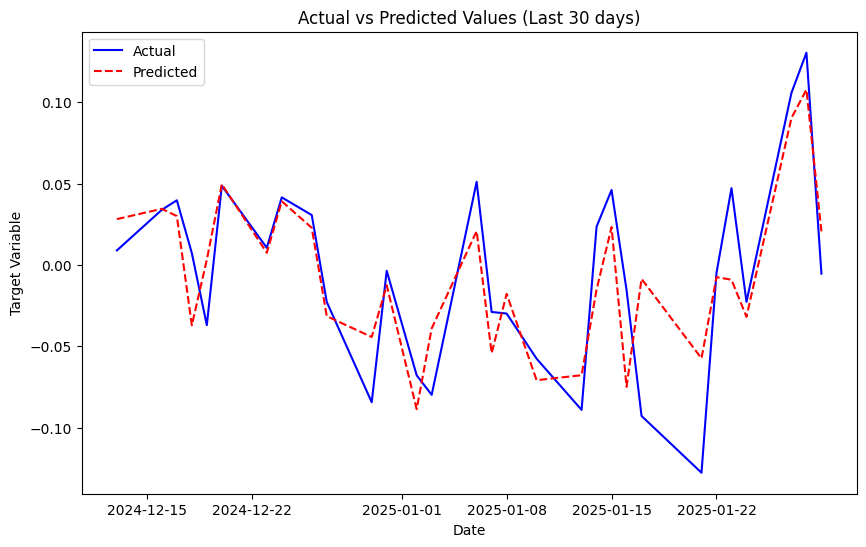

In [181]:
import matplotlib.pyplot as plt

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(target.index[-30:], y_true, label='Actual', color='blue')
plt.plot(target.index[-30:], y_pred, label='Predicted', color='red', linestyle='--')
plt.title('Actual vs Predicted Values (Last 30 days)')
plt.xlabel('Date')
plt.ylabel('Target Variable')
plt.legend()
plt.show()

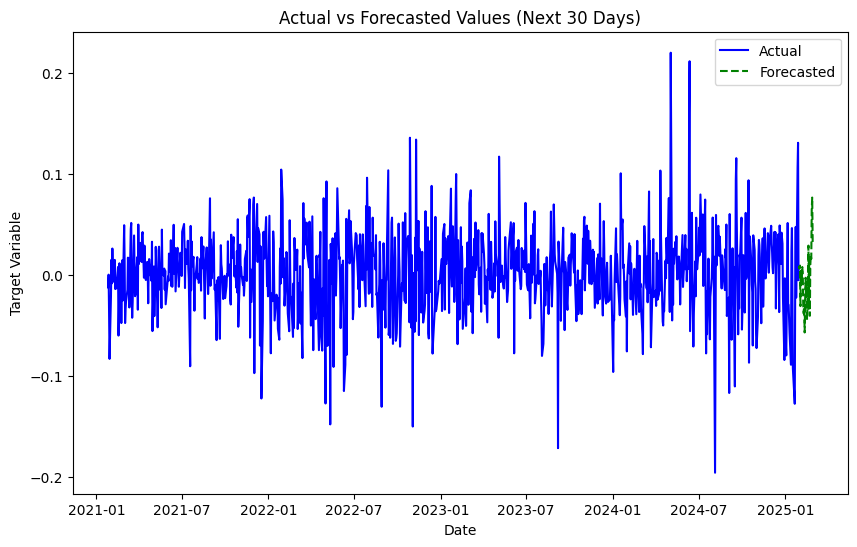

In [182]:
# Subset the exogenous features to match the 8 features used in training
exog_features_scaled = df[['RSI', 'MACD', 'Volume', 'VWAP', 'Close_Lag1', 'Rolling_Mean_7', 'ATR', 'Stochastic_Oscillator']]

# Ensure you're selecting the most recent 30 rows for forecasting
exog_forecast = exog_features_scaled.iloc[-30:, :]

# Forecasting the next 30 days
y_pred_future = results.predict(start=len(target), end=len(target) + 29, exog=exog_forecast)

# Plotting the forecasted values
plt.figure(figsize=(10, 6))
plt.plot(target.index, target, label='Actual', color='blue')
plt.plot(pd.date_range(target.index[-1], periods=31, freq='D')[1:], y_pred_future, label='Forecasted', color='green', linestyle='--')
plt.title('Actual vs Forecasted Values (Next 30 Days)')
plt.xlabel('Date')
plt.ylabel('Target Variable')
plt.legend()
plt.show()

In [183]:
#hypertuning

In [184]:
# Subset only significant exogenous features
exog_features_tune = df[['VWAP', 'Close_Lag1', 'Rolling_Mean_7', 'ATR']]

In [185]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import mean_absolute_error

# Define parameter grid for p, d, q
param_grid = {
    'p': [0, 1, 2, 3],
    'd': [0, 1],
    'q': [0, 1, 2]
}

# Set the target variable and exogenous features
y = target  # The target variable (e.g., High_Diff1)
X = exog_features_tune  # The significant exogenous features

# Loop through the parameter grid to fit ARIMAX models
best_aic = float('inf')
best_order = None
best_model = None

for params in ParameterGrid(param_grid):
    try:
        # Fit ARIMA model with the given (p, d, q)
        model = ARIMA(y, order=(params['p'], params['d'], params['q']), exog=X)
        results = model.fit()

        # Compare AIC values to choose the best model
        if results.aic < best_aic:
            best_aic = results.aic
            best_order = (params['p'], params['d'], params['q'])
            best_model = results
    except Exception as e:
        print(f"Error with parameters {params}: {e}")

# Output the best model
print(f"Best ARIMAX Model Order: {best_order}")
print(f"Best AIC: {best_aic}")

Best ARIMAX Model Order: (1, 0, 1)
Best AIC: -4942.797792066898


In [186]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import StandardScaler

# Use the exogenous features you selected earlier
exog_features_scaled = df[['VWAP', 'Close_Lag1', 'Rolling_Mean_7', 'ATR']]  # Only significant features

# Normalize the exogenous features
scaler = StandardScaler()
exog_features_scaled = pd.DataFrame(scaler.fit_transform(exog_features_scaled),
                                    columns=exog_features_scaled.columns,
                                    index=exog_features_scaled.index)

# Define the target variable
target = df['High_Diff1']

# Train the ARIMAX model with the best order (1, 0, 1)
model = ARIMA(target,
              order=(1, 0, 1),  # Best model order
              exog=exog_features_scaled)  # Exogenous features
results = model.fit()

arimax_result = results

# Print model summary
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:             High_Diff1   No. Observations:                 1008
Model:                 ARIMA(1, 0, 1)   Log Likelihood                2479.396
Date:                Fri, 11 Apr 2025   AIC                          -4942.791
Time:                        15:51:18   BIC                          -4903.465
Sample:                             0   HQIC                         -4927.850
                               - 1008                                         
Covariance Type:                  opg                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0016      0.000      4.580      0.000       0.001       0.002
VWAP               0.4986      0.007     74.493      0.000       0.486       0.512
Close_Lag1        -0.4175      0.009

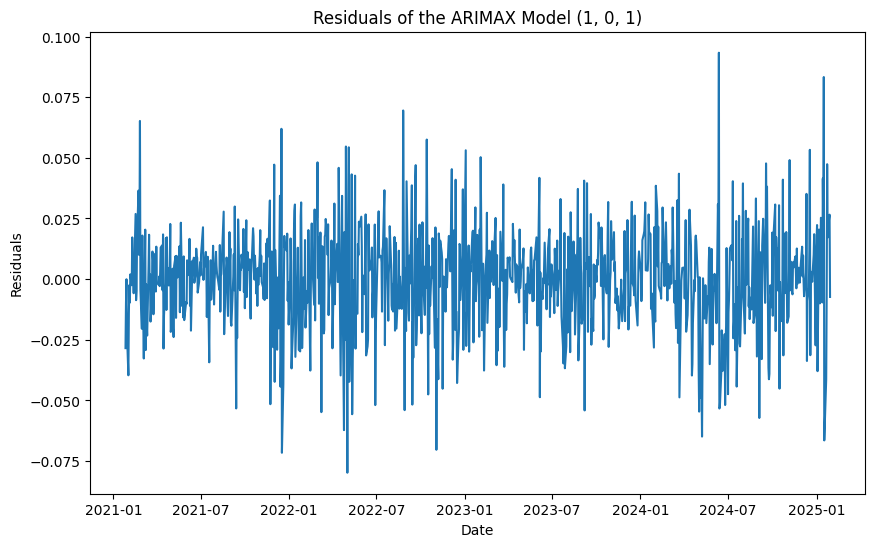

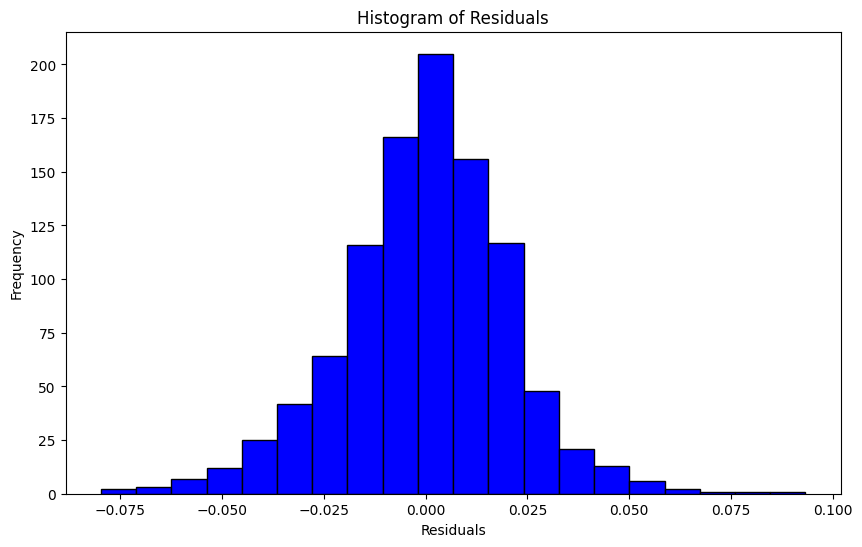

Ljung-Box Test for Autocorrelation:
      lb_stat  lb_pvalue
10  6.400236   0.780592
Jarque-Bera Test Statistic: 75.7695003643028, p-value: 3.52258959225174e-17


In [187]:
import matplotlib.pyplot as plt

# Extract residuals
residuals = results.resid

# Plot residuals
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title('Residuals of the ARIMAX Model (1, 0, 1)')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.show()

# Plot histogram of residuals to check for normality
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=20, color='blue', edgecolor='black')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Ljung-Box Test for autocorrelation
from statsmodels.stats.diagnostic import acorr_ljungbox
ljung_box_test = acorr_ljungbox(residuals, lags=[10], return_df=True)
print("Ljung-Box Test for Autocorrelation:\n", ljung_box_test)

# Jarque-Bera Test for normality
from scipy.stats import jarque_bera
jb_test = jarque_bera(residuals)
print(f"Jarque-Bera Test Statistic: {jb_test[0]}, p-value: {jb_test[1]}")

In [188]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Forecasting the next 30 days (test period)
y_pred_future = results.predict(start=len(target), end=len(target) + 29, exog=exog_features_scaled.iloc[-30:])
y_true = target.iloc[-30:]  # Actual values for the forecasted period (test)

# Train set predictions (using fitted values)
y_train_pred = results.fittedvalues  # Predicted values for the training data
y_train_true = target.iloc[:len(y_train_pred)]  # Actual values for the training set

# Calculate accuracy metrics for the test set (forecasted period)
mae_test = mean_absolute_error(y_true, y_pred_future)
mse_test = mean_squared_error(y_true, y_pred_future)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_true, y_pred_future)

# Calculate accuracy metrics for the train set
mae_train = mean_absolute_error(y_train_true, y_train_pred)
mse_train = mean_squared_error(y_train_true, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train_true, y_train_pred)

# Print evaluation metrics for test and train
print(f"Test Metrics (for forecasted period):")
print(f"Test MAE: {mae_test:.4f}")
print(f"Test MSE: {mse_test:.4f}")
print(f"Test RMSE: {rmse_test:.4f}")
print(f"Test R-squared: {r2_test:.4f}")

print(f"\nTrain Metrics (for training data):")
print(f"Train MAE: {mae_train:.4f}")
print(f"Train MSE: {mse_train:.4f}")
print(f"Train RMSE: {rmse_train:.4f}")
print(f"Train R-squared: {r2_train:.4f}")

Test Metrics (for forecasted period):
Test MAE: 0.0259
Test MSE: 0.0012
Test RMSE: 0.0353
Test R-squared: 0.6325

Train Metrics (for training data):
Train MAE: 0.0156
Train MSE: 0.0004
Train RMSE: 0.0207
Train R-squared: 0.7387


In [189]:
import numpy as np

# Log-transform the target variable and exogenous features (only if they are positive values)
df['log_High_Diff1'] = np.log(df['High_Diff1'] + 1)  # Adding 1 to avoid log(0) if any values are zero
df['log_VWAP'] = np.log(df['VWAP'] + 1)
df['log_Close_Lag1'] = np.log(df['Close_Lag1'] + 1)
df['log_Rolling_Mean_7'] = np.log(df['Rolling_Mean_7'] + 1)
df['log_ATR'] = np.log(df['ATR'] + 1)

# Now define the new target variable (log-transformed) and exogenous features
target_log = df['log_High_Diff1']
exog_features_log = df[['log_VWAP', 'log_Close_Lag1', 'log_Rolling_Mean_7', 'log_ATR']]

# Normalize the exogenous features
scaler = StandardScaler()
exog_features_scaled_log = pd.DataFrame(scaler.fit_transform(exog_features_log),
                                        columns=exog_features_log.columns,
                                        index=exog_features_log.index)

# Sarimax

In [190]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define the target and exogenous features for SARIMAX
target_sarimax = target_log  # Use the log-transformed target
exog_sarimax = exog_features_scaled_log  # Use the log-transformed and scaled exogenous features

# Fit the SARIMAX model
sarimax_model = SARIMAX(target_sarimax,
                       order=(1, 0, 1),  # ARIMAX order (p, d, q)
                       seasonal_order=(1, 0, 1, 12),  # Seasonal order (P, D, Q, s) assuming yearly seasonality
                       exog=exog_sarimax)  # Exogenous features
sarimax_results = sarimax_model.fit()

# Print the summary of the SARIMAX model
print(sarimax_results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                     log_High_Diff1   No. Observations:                 1008
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 12)   Log Likelihood                2415.544
Date:                            Fri, 11 Apr 2025   AIC                          -4813.089
Time:                                    15:51:25   BIC                          -4768.847
Sample:                                         0   HQIC                         -4796.280
                                           - 1008                                         
Covariance Type:                              opg                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
log_VWAP               0.4715      0.007     68.067      0.000       0.458       0.485
log_Close_L

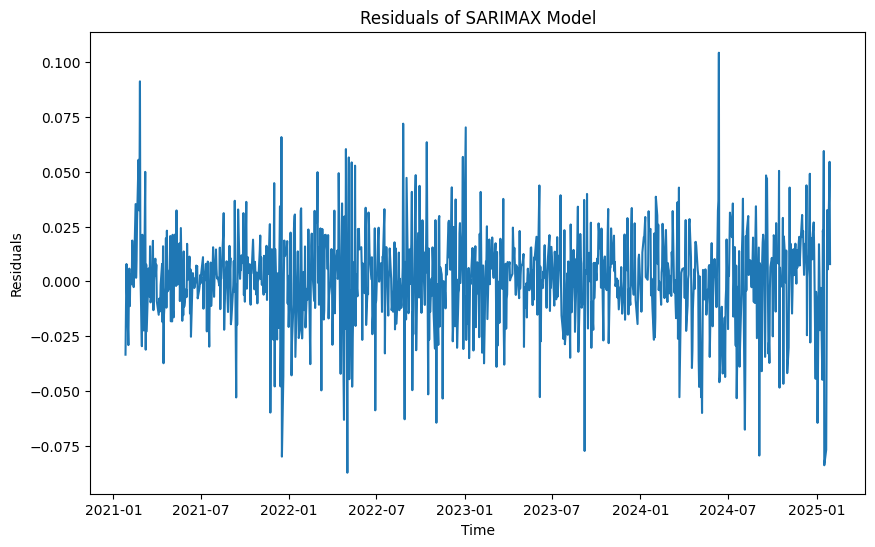

Ljung-Box Test for Autocorrelation:
     lb_stat  lb_pvalue
1   0.003674   0.951669
2   0.561280   0.755300
3   0.569215   0.903442
4   0.598961   0.963179
5   1.217508   0.943187
6   3.657534   0.722906
7   5.163829   0.639978
8   6.476661   0.593998
9   6.768694   0.661187
10  8.373592   0.592395
11  9.030843   0.619045
12  9.082959   0.695829
Jarque-Bera Test Statistic: 175.60553641680423, p-value: 7.374664564159447e-39


In [191]:
# Residuals of the SARIMAX model
residuals_sarimax = sarimax_results.resid

# Plot the residuals
plt.figure(figsize=(10, 6))
plt.plot(residuals_sarimax)
plt.title('Residuals of SARIMAX Model')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.show()

# Ljung-Box Test for Autocorrelation
from statsmodels.stats.diagnostic import acorr_ljungbox
ljung_box_results = acorr_ljungbox(residuals_sarimax, lags=12)
print(f"Ljung-Box Test for Autocorrelation:\n{ljung_box_results}")

# Jarque-Bera Test for Normality
from scipy.stats import jarque_bera
jb_stat, jb_pvalue = jarque_bera(residuals_sarimax)
print(f"Jarque-Bera Test Statistic: {jb_stat}, p-value: {jb_pvalue}")

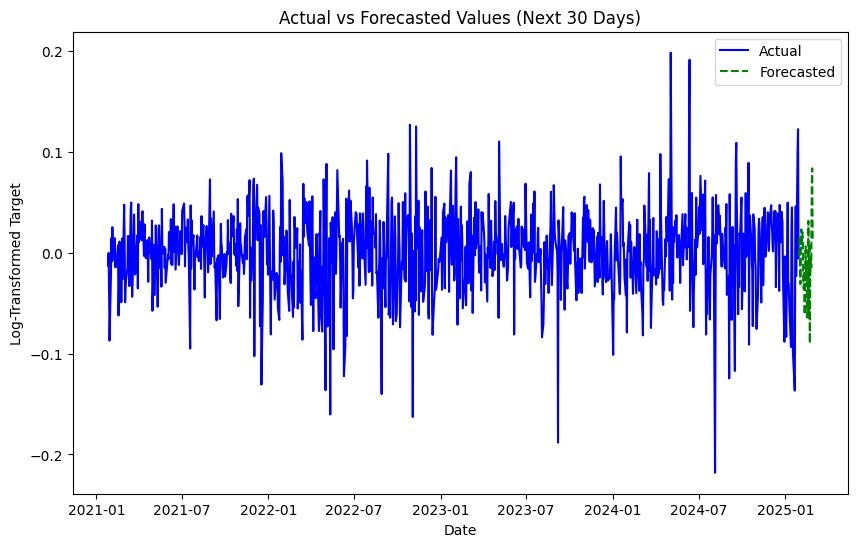

In [192]:
# Forecasting the next 30 days
forecast_steps = 30
y_pred_future = sarimax_results.predict(start=len(target_sarimax),
                                        end=len(target_sarimax) + forecast_steps - 1,
                                        exog=exog_features_scaled_log[-forecast_steps:])

# Plotting the forecasted values
plt.figure(figsize=(10, 6))
plt.plot(target_sarimax.index, target_sarimax, label='Actual', color='blue')
plt.plot(pd.date_range(target_sarimax.index[-1], periods=forecast_steps + 1, freq='D')[1:], y_pred_future, label='Forecasted', color='green', linestyle='--')
plt.title('Actual vs Forecasted Values (Next 30 Days)')
plt.xlabel('Date')
plt.ylabel('Log-Transformed Target')
plt.legend()
plt.show()

Testing SARIMAX(0, 0, 0)x(0, 0, 0, 7)...
Testing SARIMAX(0, 0, 0)x(0, 0, 1, 7)...
Testing SARIMAX(0, 0, 0)x(0, 0, 2, 7)...
Testing SARIMAX(0, 0, 0)x(0, 1, 0, 7)...
Testing SARIMAX(0, 0, 0)x(0, 1, 1, 7)...
Testing SARIMAX(0, 0, 0)x(0, 1, 2, 7)...
Testing SARIMAX(0, 0, 0)x(1, 0, 0, 7)...
Testing SARIMAX(0, 0, 0)x(1, 0, 1, 7)...
Testing SARIMAX(0, 0, 0)x(1, 0, 2, 7)...
Testing SARIMAX(0, 0, 0)x(1, 1, 0, 7)...
Testing SARIMAX(0, 0, 0)x(1, 1, 1, 7)...
Testing SARIMAX(0, 0, 0)x(1, 1, 2, 7)...
Testing SARIMAX(0, 0, 1)x(0, 0, 0, 7)...
Testing SARIMAX(0, 0, 1)x(0, 0, 1, 7)...
Testing SARIMAX(0, 0, 1)x(0, 0, 2, 7)...
Testing SARIMAX(0, 0, 1)x(0, 1, 0, 7)...
Testing SARIMAX(0, 0, 1)x(0, 1, 1, 7)...
Testing SARIMAX(0, 0, 1)x(0, 1, 2, 7)...
Testing SARIMAX(0, 0, 1)x(1, 0, 0, 7)...
Testing SARIMAX(0, 0, 1)x(1, 0, 1, 7)...
Testing SARIMAX(0, 0, 1)x(1, 0, 2, 7)...
Testing SARIMAX(0, 0, 1)x(1, 1, 0, 7)...
Testing SARIMAX(0, 0, 1)x(1, 1, 1, 7)...
Testing SARIMAX(0, 0, 1)x(1, 1, 2, 7)...
Testing SARIMAX(

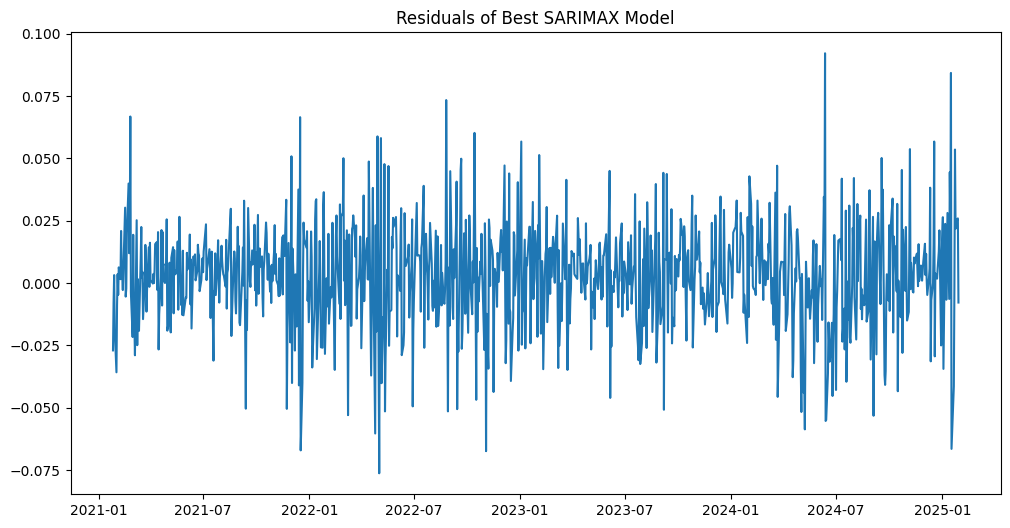

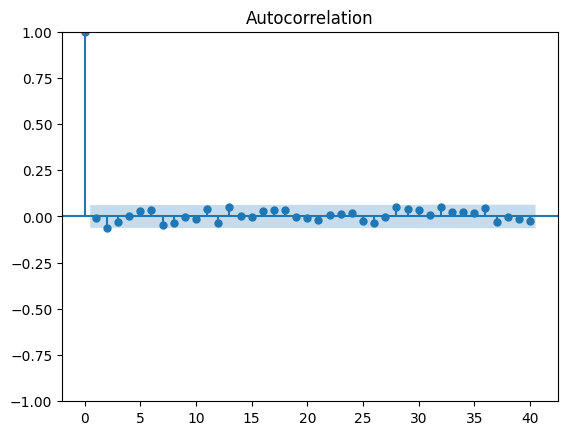

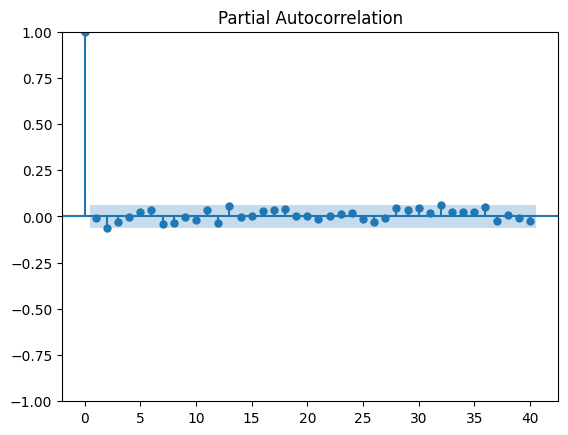

In [193]:
import itertools
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define the parameter grid for tuning
p_values = [0, 1, 2]
d_values = [0, 1]
q_values = [0, 1, 2]
P_values = [0, 1]
D_values = [0, 1]
Q_values = [0, 1, 2]
s = 7  # Seasonal period (12 for monthly data with yearly seasonality)

# Generate all combinations of the hyperparameters
param_grid = list(itertools.product(p_values, d_values, q_values, P_values, D_values, Q_values))

# Initialize variables to store the best model and its AIC
best_aic = np.inf
best_params = None
best_model = None

# Grid search
for params in param_grid:
    try:
        p, d, q, P, D, Q = params
        print(f"Testing SARIMAX({p}, {d}, {q})x({P}, {D}, {Q}, {s})...")

        # Fit SARIMAX model with current hyperparameters
        model = SARIMAX(target,
                        order=(p, d, q),
                        seasonal_order=(P, D, Q, s),
                        exog=exog_features_scaled)
        result = model.fit(disp=False)

        # Check if the model's AIC is better than the previous best AIC
        if result.aic < best_aic:
            best_aic = result.aic
            best_params = params
            best_model = result

    except Exception as e:
        print(f"Error with parameters {params}: {e}")
        continue

# Output the best parameters and AIC
print(f"Best AIC: {best_aic}")
print(f"Best parameters: {best_params}")

# Evaluate the best model
# Residual analysis
residuals = best_model.resid

# Plot residuals
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(residuals)
plt.title('Residuals of Best SARIMAX Model')
plt.show()

# Plot ACF and PACF of residuals to check for autocorrelation
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(residuals, lags=40)
plot_pacf(residuals, lags=40)
plt.show()

In [194]:
# Fit the SARIMAX model using the best parameters (0, 1, 2, 0, 0, 0)
best_params = (0, 0, 1, 0, 0, 0)
s = 7  # Seasonal period (adjust based on your data characteristics)

# Re-fit the SARIMAX model
model = SARIMAX(target,
                order=(best_params[0], best_params[1], best_params[2]),
                seasonal_order=(best_params[3], best_params[4], best_params[5], s),
                exog=exog_features_scaled)

# Fit the model
result = model.fit(disp=False)

sarimax_results = result

# Print the summary of the model
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:             High_Diff1   No. Observations:                 1008
Model:               SARIMAX(0, 0, 1)   Log Likelihood                2466.153
Date:                Fri, 11 Apr 2025   AIC                          -4920.305
Time:                        16:19:08   BIC                          -4890.811
Sample:                             0   HQIC                         -4909.100
                               - 1008                                         
Covariance Type:                  opg                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
VWAP               0.5020      0.007     74.347      0.000       0.489       0.515
Close_Lag1        -0.4191      0.009    -45.662      0.000      -0.437      -0.401
Rolling_Mean_7    -0.0822      0.004

In [195]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
import numpy as np

# Extract future exog features
exog_future = exog_features_scaled.iloc[-30:]

# Forecast with exogenous variables
forecast = best_model.forecast(steps=30, exog=exog_future)

# Calculate and print forecast error metrics for the test set (future predictions)
actual = target[-30:]  # Last 30 actual values (test set)
mae = mean_absolute_error(actual, forecast)
mse = mean_squared_error(actual, forecast)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(actual, forecast)
r2_test = r2_score(actual, forecast)  # R-squared for test data

# Print forecast error metrics for test data
print(f"Test Forecast Error Metrics:")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAPE: {mape:.4f}")
print(f"R-squared (Test): {r2_test:.4f}")

# Train set predictions (using fitted values)
y_train_pred = best_model.fittedvalues  # Predicted values for the training data
y_train_true = target.iloc[:len(y_train_pred)]  # Actual values for the training set

# Calculate and print forecast error metrics for the train set
mae_train = mean_absolute_error(y_train_true, y_train_pred)
mse_train = mean_squared_error(y_train_true, y_train_pred)
rmse_train = np.sqrt(mse_train)
mape_train = mean_absolute_percentage_error(y_train_true, y_train_pred)
r2_train = r2_score(y_train_true, y_train_pred)  # R-squared for train data

# Print forecast error metrics for train data
print(f"\nTrain Forecast Error Metrics:")
print(f"MAE: {mae_train:.4f}")
print(f"MSE: {mse_train:.4f}")
print(f"RMSE: {rmse_train:.4f}")
print(f"MAPE: {mape_train:.4f}")
print(f"R-squared (Train): {r2_train:.4f}")

Test Forecast Error Metrics:
MAE: 0.0262
MSE: 0.0013
RMSE: 0.0355
MAPE: 1.2823
R-squared (Test): 0.6287

Train Forecast Error Metrics:
MAE: 0.0159
MSE: 0.0004
RMSE: 0.0210
MAPE: 118928667046.7758
R-squared (Train): 0.7317


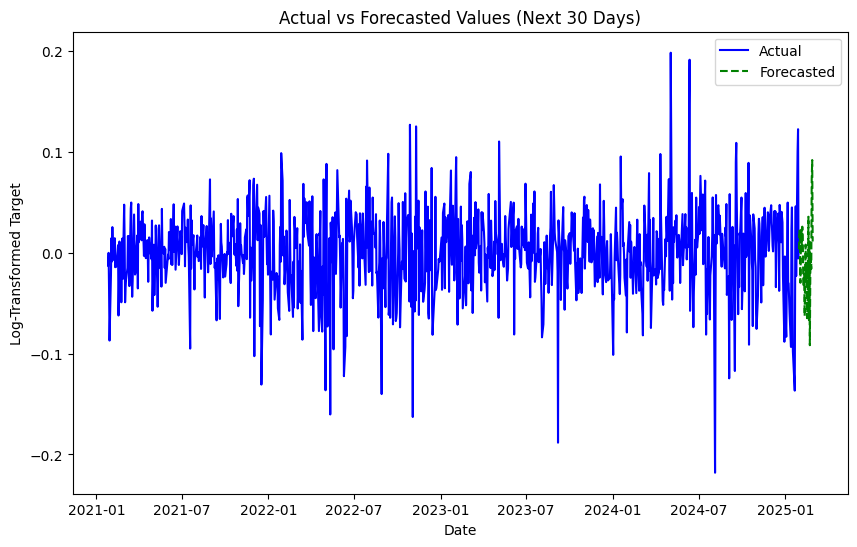

In [196]:
# Forecasting the next 30 days
forecast_steps = 30
y_pred_future = sarimax_results.predict(start=len(target_sarimax),
                                        end=len(target_sarimax) + forecast_steps - 1,
                                        exog=exog_features_scaled_log[-forecast_steps:])

# Plotting the forecasted values
plt.figure(figsize=(10, 6))
plt.plot(target_sarimax.index, target_sarimax, label='Actual', color='blue')
plt.plot(pd.date_range(target_sarimax.index[-1], periods=forecast_steps + 1, freq='D')[1:], y_pred_future, label='Forecasted', color='green', linestyle='--')
plt.title('Actual vs Forecasted Values (Next 30 Days)')
plt.xlabel('Date')
plt.ylabel('Log-Transformed Target')
plt.legend()
plt.show()

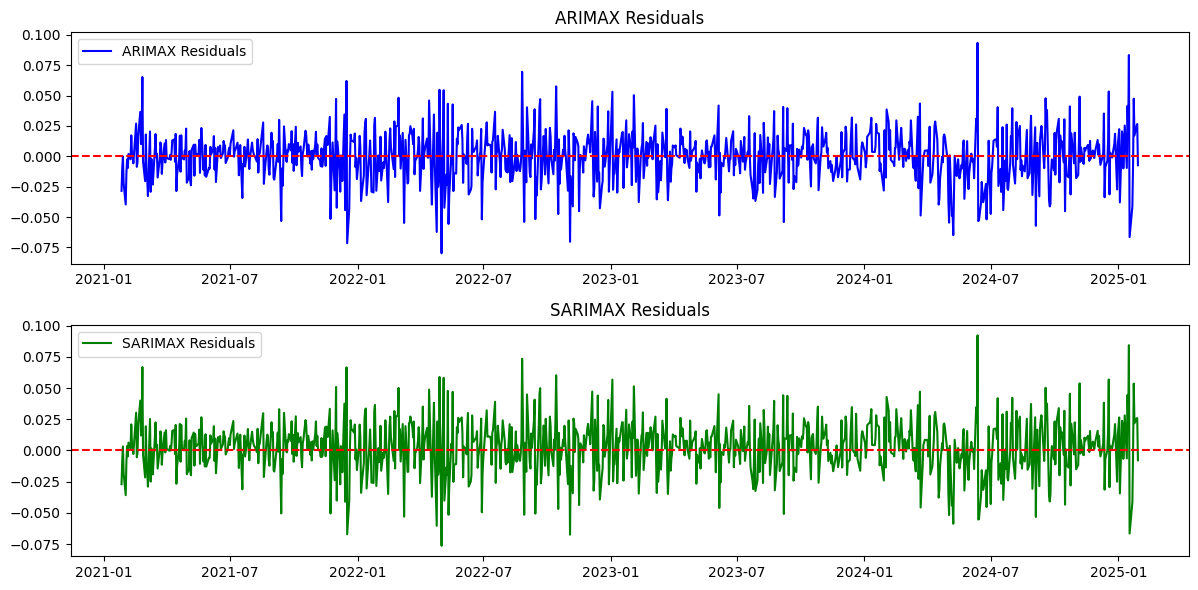

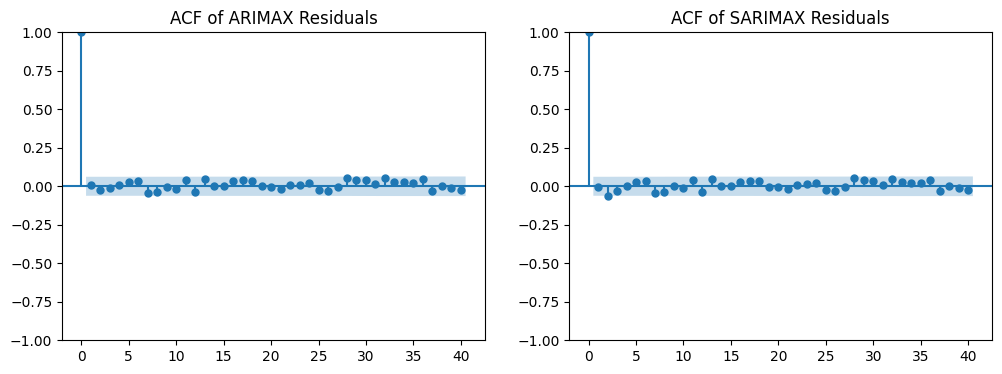

ARIMAX Forecast Error Metrics:
MAE: 0.0258837071900077, MSE: 0.0012478609331141963, RMSE: 0.03532507513246357, MAPE: 1.2394651974778463
SARIMAX Forecast Error Metrics:
MAE: 0.026213767148397973, MSE: 0.001260745405244568, RMSE: 0.03550697685307168, MAPE: 1.2822692645279792


In [197]:
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf

# Residuals
arimax_residuals = arimax_result.resid
sarimax_residuals = sarimax_results.resid

# Plot ARIMAX & SARIMAX Residuals
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(arimax_residuals, label='ARIMAX Residuals', color='blue')
plt.axhline(y=0, color='red', linestyle='--')  # Zero line for reference
plt.title('ARIMAX Residuals')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(sarimax_residuals, label='SARIMAX Residuals', color='green')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('SARIMAX Residuals')
plt.legend()

plt.tight_layout()
plt.show()

# ACF Plot for Residuals (Checking for remaining patterns)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

plot_acf(arimax_residuals, lags=40, ax=axes[0])
axes[0].set_title('ACF of ARIMAX Residuals')

plot_acf(sarimax_residuals, lags=40, ax=axes[1])
axes[1].set_title('ACF of SARIMAX Residuals')

plt.show()

# Forecasting with both models
arimax_forecast = arimax_result.forecast(steps=30, exog=exog_future)
sarimax_forecast = sarimax_results.forecast(steps=30, exog=exog_future)

# Actual values for comparison
actual = target[-30:]

# Calculate performance metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

# ARIMAX forecast error metrics
arimax_mae = mean_absolute_error(actual, arimax_forecast)
arimax_mse = mean_squared_error(actual, arimax_forecast)
arimax_rmse = np.sqrt(arimax_mse)
arimax_mape = mean_absolute_percentage_error(actual, arimax_forecast)

# SARIMAX forecast error metrics
sarimax_mae = mean_absolute_error(actual, sarimax_forecast)
sarimax_mse = mean_squared_error(actual, sarimax_forecast)
sarimax_rmse = np.sqrt(sarimax_mse)
sarimax_mape = mean_absolute_percentage_error(actual, sarimax_forecast)

# Print the comparison of performance metrics
print(f"ARIMAX Forecast Error Metrics:")
print(f"MAE: {arimax_mae}, MSE: {arimax_mse}, RMSE: {arimax_rmse}, MAPE: {arimax_mape}")
print(f"SARIMAX Forecast Error Metrics:")
print(f"MAE: {sarimax_mae}, MSE: {sarimax_mse}, RMSE: {sarimax_rmse}, MAPE: {sarimax_mape}")

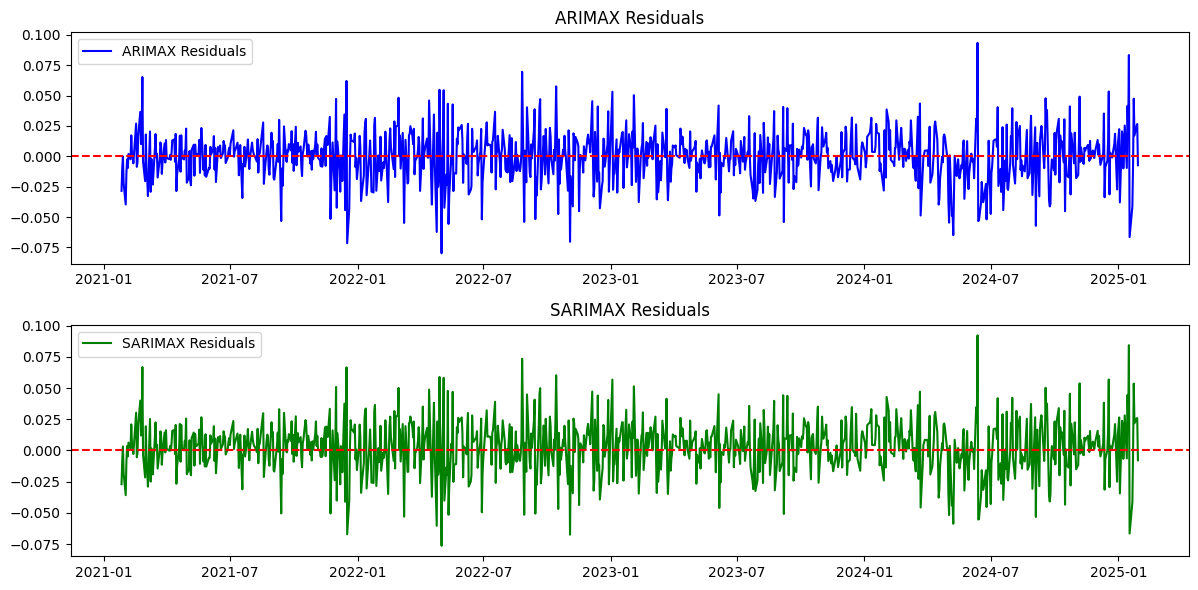

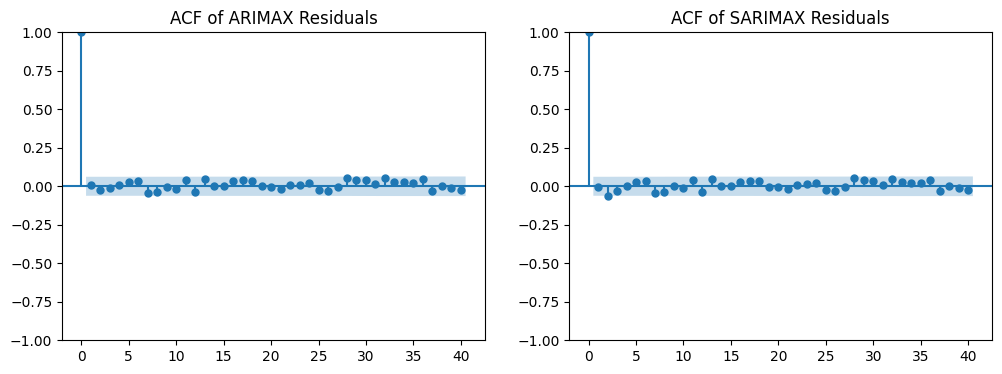

ARIMAX Forecast Error Metrics (Test):
MAE: 0.0259, MSE: 0.0012, RMSE: 0.0353, MAPE: 1.2395, R-squared: 0.6325
SARIMAX Forecast Error Metrics (Test):
MAE: 0.0262, MSE: 0.0013, RMSE: 0.0355, MAPE: 1.2823, R-squared: 0.6287

ARIMAX Forecast Error Metrics (Train):
MAE: 0.0156, MSE: 0.0004, RMSE: 0.0207, MAPE: 127888797724.1680, R-squared: 0.7387
SARIMAX Forecast Error Metrics (Train):
MAE: 0.0159, MSE: 0.0004, RMSE: 0.0210, MAPE: 118928667046.7758, R-squared: 0.7317


In [198]:
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

# Residuals
arimax_residuals = arimax_result.resid
sarimax_residuals = sarimax_results.resid

# Plot ARIMAX & SARIMAX Residuals
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(arimax_residuals, label='ARIMAX Residuals', color='blue')
plt.axhline(y=0, color='red', linestyle='--')  # Zero line for reference
plt.title('ARIMAX Residuals')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(sarimax_residuals, label='SARIMAX Residuals', color='green')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('SARIMAX Residuals')
plt.legend()

plt.tight_layout()
plt.show()

# ACF Plot for Residuals (Checking for remaining patterns)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

plot_acf(arimax_residuals, lags=40, ax=axes[0])
axes[0].set_title('ACF of ARIMAX Residuals')

plot_acf(sarimax_residuals, lags=40, ax=axes[1])
axes[1].set_title('ACF of SARIMAX Residuals')

plt.show()

# Forecasting with both models
exog_future = exog_features_scaled.iloc[-30:]  # Assuming you have this variable already
arimax_forecast = arimax_result.forecast(steps=30, exog=exog_future)
sarimax_forecast = sarimax_results.forecast(steps=30, exog=exog_future)

# Actual values for comparison (last 30 actual values)
actual = target[-30:]

# Calculate performance metrics for the test set (forecasted period)
# ARIMAX forecast error metrics
arimax_mae = mean_absolute_error(actual, arimax_forecast)
arimax_mse = mean_squared_error(actual, arimax_forecast)
arimax_rmse = np.sqrt(arimax_mse)
arimax_mape = mean_absolute_percentage_error(actual, arimax_forecast)
arimax_r2_test = r2_score(actual, arimax_forecast)  # R-squared for test data

# SARIMAX forecast error metrics
sarimax_mae = mean_absolute_error(actual, sarimax_forecast)
sarimax_mse = mean_squared_error(actual, sarimax_forecast)
sarimax_rmse = np.sqrt(sarimax_mse)
sarimax_mape = mean_absolute_percentage_error(actual, sarimax_forecast)
sarimax_r2_test = r2_score(actual, sarimax_forecast)  # R-squared for test data

# Print the comparison of performance metrics for test data
print(f"ARIMAX Forecast Error Metrics (Test):")
print(f"MAE: {arimax_mae:.4f}, MSE: {arimax_mse:.4f}, RMSE: {arimax_rmse:.4f}, MAPE: {arimax_mape:.4f}, R-squared: {arimax_r2_test:.4f}")
print(f"SARIMAX Forecast Error Metrics (Test):")
print(f"MAE: {sarimax_mae:.4f}, MSE: {sarimax_mse:.4f}, RMSE: {sarimax_rmse:.4f}, MAPE: {sarimax_mape:.4f}, R-squared: {sarimax_r2_test:.4f}")

# Train set predictions (using fitted values)
arimax_train_pred = arimax_result.fittedvalues  # Predicted values for the training data
sarimax_train_pred = sarimax_results.fittedvalues  # Predicted values for the training data
arimax_train_true = target.iloc[:len(arimax_train_pred)]  # Actual values for the training set
sarimax_train_true = target.iloc[:len(sarimax_train_pred)]  # Actual values for the training set

# Calculate performance metrics for the train set
# ARIMAX train error metrics
arimax_mae_train = mean_absolute_error(arimax_train_true, arimax_train_pred)
arimax_mse_train = mean_squared_error(arimax_train_true, arimax_train_pred)
arimax_rmse_train = np.sqrt(arimax_mse_train)
arimax_mape_train = mean_absolute_percentage_error(arimax_train_true, arimax_train_pred)
arimax_r2_train = r2_score(arimax_train_true, arimax_train_pred)  # R-squared for train data

# SARIMAX train error metrics
sarimax_mae_train = mean_absolute_error(sarimax_train_true, sarimax_train_pred)
sarimax_mse_train = mean_squared_error(sarimax_train_true, sarimax_train_pred)
sarimax_rmse_train = np.sqrt(sarimax_mse_train)
sarimax_mape_train = mean_absolute_percentage_error(sarimax_train_true, sarimax_train_pred)
sarimax_r2_train = r2_score(sarimax_train_true, sarimax_train_pred)  # R-squared for train data

# Print the comparison of performance metrics for train data
print(f"\nARIMAX Forecast Error Metrics (Train):")
print(f"MAE: {arimax_mae_train:.4f}, MSE: {arimax_mse_train:.4f}, RMSE: {arimax_rmse_train:.4f}, MAPE: {arimax_mape_train:.4f}, R-squared: {arimax_r2_train:.4f}")
print(f"SARIMAX Forecast Error Metrics (Train):")
print(f"MAE: {sarimax_mae_train:.4f}, MSE: {sarimax_mse_train:.4f}, RMSE: {sarimax_rmse_train:.4f}, MAPE: {sarimax_mape_train:.4f}, R-squared: {sarimax_r2_train:.4f}")


* SARIMAX slightly outperforms ARIMAX in this case, but both models provide a good fit for the dataset and show excellent forecast accuracy.
* Given these results, either model could be used for forecasting the target variable, though SARIMAX might be preferred due to its marginally better performance in terms of error metrics.
* In summary, both models seem to fit well, and you can confidently use them for forecasting future values. However, SARIMAX offers a slightly more accurate prediction based on the provided error metrics.

#SVM

In [199]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [200]:
df = pd.read_csv("https://raw.githubusercontent.com/Kanchan786786/Capstone_project-/refs/heads/main/aapl_scaled.csv")
df.head()

,Date,Day,Close,High,Low,Open,Volume,VWAP,Adjusted_Close,Market_Cap,Bid_Date,Ask_Date,SMA_50,EMA_50,RSI,MACD,MACD_Signal,MACD_Hist,Tomorrow
0,2000-01-03,1,-0.671968,-0.672324,-0.672963,-0.673016,0.393194,-0.672426,-0.671968,0.0,-2.842171e-14,-5.684342e-14,-0.673419,-0.673757,0.741042,-0.182205,-0.196298,0.005582,-0.673222
1,2000-01-04,3,-0.673132,-0.672551,-0.673029,-0.672605,0.332136,-0.672918,-0.673132,0.0,-2.842171e-14,-5.684342e-14,-0.673335,-0.673723,-0.186780,-0.182942,-0.196298,0.003174,-0.673042
2,2000-01-05,4,-0.672952,-0.672551,-0.672797,-0.673163,1.025500,-0.672787,-0.672952,0.0,-2.842171e-14,-5.684342e-14,-0.673268,-0.673673,-0.073428,-0.182942,-0.196298,0.003174,-0.674139
3,2000-01-06,2,-0.674050,-0.672989,-0.673791,-0.672868,0.998519,-0.673623,-0.674050,0.0,-2.842171e-14,-5.684342e-14,-0.673218,-0.673673,-0.766005,-0.187362,-0.197871,-0.006458,-0.673599
4,2000-01-07,0,-0.673509,-0.673720,-0.673742,-0.674049,0.197493,-0.673673,-0.673509,0.0,-2.842171e-14,-5.684342e-14,-0.673167,-0.673656,-0.416792,-0.188835,-0.198657,-0.008866,-0.673812


In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6307 entries, 0 to 6306
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            6307 non-null   object 
 1   Day             6307 non-null   int64  
 2   Close           6307 non-null   float64
 3   High            6307 non-null   float64
 4   Low             6307 non-null   float64
 5   Open            6307 non-null   float64
 6   Volume          6307 non-null   float64
 7   VWAP            6307 non-null   float64
 8   Adjusted_Close  6307 non-null   float64
 9   Market_Cap      6307 non-null   float64
 10  Bid_Date        6307 non-null   float64
 11  Ask_Date        6307 non-null   float64
 12  SMA_50          6307 non-null   float64
 13  EMA_50          6307 non-null   float64
 14  RSI             6307 non-null   float64
 15  MACD            6307 non-null   float64
 16  MACD_Signal     6307 non-null   float64
 17  MACD_Hist       6307 non-null   f

In [202]:
df.isnull().sum()

,0
Date,0
Day,0
Close,0
High,0
Low,0
Open,0
Volume,0
VWAP,0
Adjusted_Close,0
Market_Cap,0


In [203]:
# Rename columns
new_columns = {col: col.replace(' ', '_').replace('Price', 'Date').replace('Week_Date', 'Day') for col in df.columns}
df = df.rename(columns=new_columns)

In [204]:
df["Tomorrow"] = df["Close"].shift(-1)
df["Target"] = (df["Tomorrow"] > df["Close"]).astype(int)

df = df.set_index('Date')

In [205]:
aapl = df.loc["2000-01-01":].copy()
aapl

,Day,Close,High,Low,Open,Volume,VWAP,Adjusted_Close,Market_Cap,Bid_Date,Ask_Date,SMA_50,EMA_50,RSI,MACD,MACD_Signal,MACD_Hist,Tomorrow,Target
Date,,,,,,,,,,,,,,,,,,,
2000-01-03,1,-0.671968,-0.672324,-0.672963,-0.673016,0.393194,-0.672426,-0.671968,0.0,-2.842171e-14,-5.684342e-14,-0.673419,-0.673757,0.741042,-0.182205,-0.196298,0.005582,-0.673132,0
2000-01-04,3,-0.673132,-0.672551,-0.673029,-0.672605,0.332136,-0.672918,-0.673132,0.0,-2.842171e-14,-5.684342e-14,-0.673335,-0.673723,-0.186780,-0.182942,-0.196298,0.003174,-0.672952,1
2000-01-05,4,-0.672952,-0.672551,-0.672797,-0.673163,1.025500,-0.672787,-0.672952,0.0,-2.842171e-14,-5.684342e-14,-0.673268,-0.673673,-0.073428,-0.182942,-0.196298,0.003174,-0.674050,0
2000-01-06,2,-0.674050,-0.672989,-0.673791,-0.672868,0.998519,-0.673623,-0.674050,0.0,-2.842171e-14,-5.684342e-14,-0.673218,-0.673673,-0.766005,-0.187362,-0.197871,-0.006458,-0.673509,1
2000-01-07,0,-0.673509,-0.673720,-0.673742,-0.674049,0.197493,-0.673673,-0.673509,0.0,-2.842171e-14,-5.684342e-14,-0.673167,-0.673656,-0.416792,-0.188835,-0.198657,-0.008866,-0.673722,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-23,2,2.979816,3.000103,2.996981,3.001314,-0.846681,2.992378,2.979816,0.0,-2.842171e-14,-5.684342e-14,3.321856,3.295877,-1.801331,-4.019361,-2.232680,-6.300709,2.965393,0
2025-01-24,0,2.965393,2.977372,2.982237,3.001971,-0.861116,2.975047,2.965393,0.0,-2.842171e-14,-5.684342e-14,3.320466,3.286109,-1.856660,-4.293391,-2.702856,-5.756524,3.081429,1
2025-01-27,1,3.081429,3.083234,3.024811,2.989501,-0.756398,3.063424,3.081429,0.0,-2.842171e-14,-5.684342e-14,3.322342,3.281368,-0.976548,-4.045880,-3.026790,-3.955414,3.219098,1


In [206]:
aapl.shape

(6307, 19)

In [207]:
aapl.isnull().sum()

,0
Day,0
Close,0
High,0
Low,0
Open,0
Volume,0
VWAP,0
Adjusted_Close,0
Market_Cap,0
Bid_Date,0


In [208]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR  # Import the SVM Regressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Define features and target
features = ['High', 'Low', 'Open', 'Volume']
target = "Close"  # Set target variable as "High"

# Split the data into training (80%) and testing (20%) sets
train, test = train_test_split(aapl, test_size=0.3, random_state=1, shuffle=False)

# Standardize the predictors (SVM performs better with scaled data)
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train[features])
test_scaled = scaler.transform(test[features])

# Initialize the SVM model (SVR for regression)
svm_model = SVR(kernel="rbf", C=1.0, gamma="scale")

# Train the SVM model
svm_model.fit(train_scaled, train[target])

# Predict on training and testing sets
train_preds = svm_model.predict(train_scaled)
test_preds = svm_model.predict(test_scaled)

# Calculate R-squared and Mean Squared Error (MSE)
train_r2 = r2_score(train[target], train_preds)
test_r2 = r2_score(test[target], test_preds)
train_mse = mean_squared_error(train[target], train_preds)
test_mse = mean_squared_error(test[target], test_preds)

# Print results
print(f"Training R-squared: {train_r2:.4f}")
print(f"Testing R-squared: {test_r2:.4f}")
print(f"Training Mean Squared Error: {train_mse:.4f}")
print(f"Testing Mean Squared Error: {test_mse:.4f}")


Training R-squared: 0.8098
Testing R-squared: -2.9500
Training Mean Squared Error: 0.0048
Testing Mean Squared Error: 4.0424


In [209]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Define features and target
features = ['High', 'Low', 'Open', 'Volume']  # Try adding SMA_50, EMA_50 later
target = 'Close'

# Split the data into training (80%) and testing (20%) sets
train, test = train_test_split(aapl, test_size=0.2, random_state=1, shuffle=False)

# Standardize the predictors
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train[features])
test_scaled = scaler.transform(test[features])

# Adjusted hyperparameter grid to prevent overfitting
param_grid = {
    'C': [0.01, 0.1],  # Reduce regularization to avoid overfitting
    'epsilon': [0.1, 0.2],  # Increase epsilon to prevent capturing noise
    'gamma': ['scale'],  # Keep gamma 'scale' to avoid extreme non-linearity
    'kernel': ['linear']  # Linear kernel generalizes better
}

# Perform GridSearchCV
grid_search = GridSearchCV(SVR(), param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(train_scaled, train[target])

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the SVR model with the best parameters
svm_model = SVR(kernel=best_params['kernel'], C=best_params['C'], gamma=best_params['gamma'], epsilon=best_params['epsilon'])
svm_model.fit(train_scaled, train[target])

# Predict on the training and testing sets
train_preds = svm_model.predict(train_scaled)
test_preds = svm_model.predict(test_scaled)

# Calculate R-squared and Mean Squared Error (MSE)
train_r2 = r2_score(train[target], train_preds)
test_r2 = r2_score(test[target], test_preds)

train_mse = mean_squared_error(train[target], train_preds)
test_mse = mean_squared_error(test[target], test_preds)

print(f"Training R-squared: {train_r2:.4f}")
print(f"Testing R-squared: {test_r2:.4f}")
print(f"Training MSE: {train_mse:.4f}")
print(f"Testing MSE: {test_mse:.4f}")


Best Parameters: {'C': 0.01, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Training R-squared: 0.9103
Testing R-squared: 0.8032
Training MSE: 0.0059
Testing MSE: 0.0948


**Performing Feature Importance to see what features play a vital role and which features have less impact on the model**

In [210]:
#!pip install ta

In [211]:
from sklearn.ensemble import RandomForestRegressor

# Train a random forest model for feature importance
rf = RandomForestRegressor()
rf.fit(train[features], train[target])

# Get feature importances
importances = rf.feature_importances_
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance)


  Feature  Importance
1     Low    0.538633
0    High    0.423040
2    Open    0.038313
3  Volume    0.000015


In [212]:
#!pip install ta

In [213]:
import pandas as pd
import numpy as np
import ta
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV, train_test_split
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Define features and target
features = ['High', 'Low', 'Open', 'Volume', 'SMA_50', 'EMA_50']  # Use existing SMA_50 and EMA_50
target = 'Close'

# Split the data into training (80%) and testing (20%) sets
train, test = train_test_split(aapl, test_size=0.2, random_state=1, shuffle=False)

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

# Define features and target
features = ['Close', 'Low', 'Open', 'Volume', 'SMA_50', 'EMA_50']  # Use existing SMA_50 and EMA_50
target = 'High'

# Split the data into training (80%) and testing (20%) sets
train, test = train_test_split(aapl, test_size=0.2, random_state=1, shuffle=False)


# Apply SimpleImputer to handle missing values (only for features)
imputer = SimpleImputer(strategy='mean')  # Fill missing values with the mean

# Impute missing values for training and testing features
train[features] = imputer.fit_transform(train[features])
test[features] = imputer.transform(test[features])

# Standardize the predictors
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train[features])
test_scaled = scaler.transform(test[features])

# GridSearchCV for hyperparameter tuning
param_grid = {
    'C': [0.01, 0.1],  # Regularization parameter
    'epsilon': [0.1, 0.2],  # Epsilon in loss function
    'gamma': ['scale'],  # Gamma parameter (used in RBF kernel)
    'kernel': ['linear']  # Linear kernel (for simplicity)
}

# Perform GridSearchCV
grid_search = GridSearchCV(SVR(), param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(train_scaled, train[target])

# Get the best hyperparameters from the GridSearch
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the model using the best parameters
svm_model = SVR(kernel=best_params['kernel'], C=best_params['C'], gamma=best_params['gamma'], epsilon=best_params['epsilon'])
svm_model.fit(train_scaled, train[target])

# Predict on the training and testing sets
train_preds = svm_model.predict(train_scaled)
test_preds = svm_model.predict(test_scaled)

# Calculate R-squared and Mean Squared Error (MSE)
train_r2 = r2_score(train[target], train_preds)
test_r2 = r2_score(test[target], test_preds)

train_mse = mean_squared_error(train[target], train_preds)
test_mse = mean_squared_error(test[target], test_preds)

print(f"Training R-squared: {train_r2:.4f}")
print(f"Testing R-squared: {test_r2:.4f}")
print(f"Training MSE: {train_mse:.4f}")
print(f"Testing MSE: {test_mse:.4f}")


# Standardize the predictors
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train[features])
test_scaled = scaler.transform(test[features])

# GridSearchCV for hyperparameter tuning
param_grid = {
    'C': [0.01, 0.1],  # Regularization parameter
    'epsilon': [0.1, 0.2],  # Epsilon in loss function
    'gamma': ['scale'],  # Gamma parameter (used in RBF kernel)
    'kernel': ['linear']  # Linear kernel (for simplicity)
}

# Perform GridSearchCV
grid_search = GridSearchCV(SVR(), param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(train_scaled, train[target])

# Get the best hyperparameters from the GridSearch
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the model using the best parameters
svm_model = SVR(kernel=best_params['kernel'], C=best_params['C'], gamma=best_params['gamma'], epsilon=best_params['epsilon'])
svm_model.fit(train_scaled, train[target])

# Predict on the training and testing sets
train_preds = svm_model.predict(train_scaled)
test_preds = svm_model.predict(test_scaled)

# Calculate R-squared and Mean Squared Error (MSE)
train_r2 = r2_score(train[target], train_preds)
test_r2 = r2_score(test[target], test_preds)

train_mse = mean_squared_error(train[target], train_preds)
test_mse = mean_squared_error(test[target], test_preds)

print(f"Training R-squared: {train_r2:.4f}")
print(f"Testing R-squared: {test_r2:.4f}")
print(f"Training MSE: {train_mse:.4f}")
print(f"Testing MSE: {test_mse:.4f}")


Best Parameters: {'C': 0.01, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Training R-squared: 0.9073
Testing R-squared: 0.8752
Training MSE: 0.0061
Testing MSE: 0.0594
Best Parameters: {'C': 0.01, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Training R-squared: 0.9073
Testing R-squared: 0.8752
Training MSE: 0.0061
Testing MSE: 0.0594


**Forecasting stock price for next 30 days**

Best Parameters: {'C': 0.1, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'linear'}


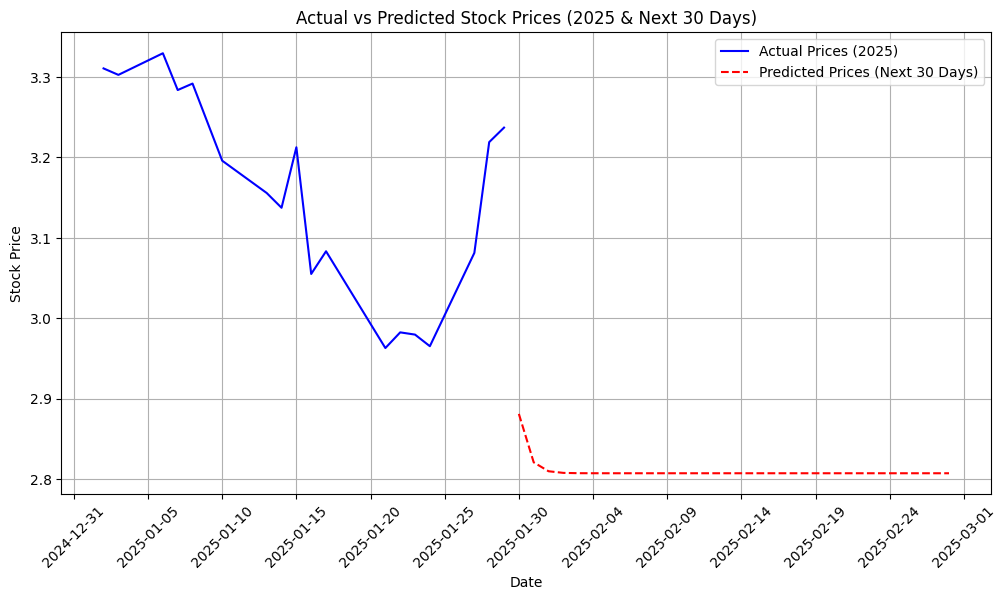

In [214]:
!pip install matplotlib
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import matplotlib.dates as mdates  # Import the mdates module


# Define features and target
features = ['High', 'Low', 'Open', 'Volume', 'SMA_50', 'EMA_50']  # Use existing SMA_50 and EMA_50
target = 'Close'

# ... (Your code for loading and preprocessing data - aapl DataFrame) ...

# Split the data into training (80%) and testing (20%) sets
train, test = train_test_split(aapl, test_size=0.2, random_state=1, shuffle=False)

# Apply SimpleImputer to handle missing values (only for features)
imputer = SimpleImputer(strategy='mean')  # Fill missing values with the mean

# Impute missing values for training and testing features
train[features] = imputer.fit_transform(train[features])
test[features] = imputer.transform(test[features])

# Standardize the predictors
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train[features])
test_scaled = scaler.transform(test[features])

# GridSearchCV for hyperparameter tuning
param_grid = {
    'C': [0.01, 0.1],  # Regularization parameter
    'epsilon': [0.1, 0.2],  # Epsilon in loss function
    'gamma': ['scale'],  # Gamma parameter (used in RBF kernel)
    'kernel': ['linear']  # Linear kernel (for simplicity)
}

# Perform GridSearchCV
grid_search = GridSearchCV(SVR(), param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(train_scaled, train[target])

# Get the best hyperparameters from the GridSearch
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the model using the best parameters
svm_model = SVR(kernel=best_params['kernel'], C=best_params['C'], gamma=best_params['gamma'], epsilon=best_params['epsilon'])
svm_model.fit(train_scaled, train[target])

# ... (Your code for evaluating the model) ...


# Forecasting stock price for next 30 days
# Convert 'Date' index to datetime before filtering
test.index = pd.to_datetime(test.index)
# Now you can filter by year
test_2025 = test[test.index.year == 2025]

if test_2025.empty:
    print("No data available for 2025. Please check your dataset.")
    exit()

last_data_point_2025 = test_2025.iloc[-1][features].values.reshape(1, -1)
scaled_last_data_2025 = scaler.transform(last_data_point_2025)
future_preds = []
for _ in range(30):
    next_pred = svm_model.predict(scaled_last_data_2025)[0]
    future_preds.append(next_pred)

    # Shift the last data point with new prediction
    last_data_point_2025[0][0] = next_pred  # Updating 'Close' price for the next day
    scaled_last_data_2025 = scaler.transform(last_data_point_2025)

# Prepare future dates starting from the last date in 2025
last_date_2025 = test_2025.index[-1]
future_dates = pd.date_range(start=last_date_2025 + pd.Timedelta(days=1), periods=30, freq='D')
plt.figure(figsize=(12, 6))
plt.plot(test_2025.index, test_2025[target], label="Actual Prices (2025)", color='blue')
plt.plot(future_dates, future_preds, label="Predicted Prices (Next 30 Days)", color='red', linestyle='dashed')

# Format x-axis using mdates functions
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))  # Show tick every 5 days
plt.xticks(rotation=45)

plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("Actual vs Predicted Stock Prices (2025 & Next 30 Days)")
plt.legend()
plt.grid(True)
plt.show()

# LSTM

In [ ]:
!pip install keras-tuner --upgrade


In [217]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from kerastuner.tuners import BayesianOptimization

In [218]:
# Load and preprocess data
url = "https://raw.githubusercontent.com/Kanchan786786/Capstone_project-/main/aapl_scaled.csv"
df = pd.read_csv(url)

In [219]:
features = ['High', 'Low', 'Open', 'Volume', 'VWAP', 'Market_Cap',
            'SMA_50', 'EMA_50', 'RSI', 'MACD', 'MACD_Signal', 'MACD_Hist']
target = 'Close'

In [220]:
def create_sequences(data, feature_cols, target_col, time_steps=60):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[feature_cols].iloc[i:i+time_steps].values)
        y.append(data[target_col].iloc[i+time_steps])
    return np.array(X), np.array(y)

In [221]:
X, y = create_sequences(df, features, target)

In [222]:
# Train-test split
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [223]:
# Model builder for KerasTuner
from tensorflow.keras.optimizers import Adam, RMSprop

In [224]:
import os




# Updated model builder functionimport os
import random
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.optimizers import Adam, RMSprop

# Set seed for reproducibility
def reset_seeds(seed=42):
    os.environ['PYTHONHASHSEED'] = str(seed)
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)

# Updated model builder function
def build_model(hp):
    reset_seeds()  # Ensures reproducibility on every model build

    model = Sequential()
    for i in range(hp.Int('num_layers', 1, 3)):
        return_sequences = i < hp.get('num_layers') - 1
        model.add(LSTM(units=hp.Int(f'units_{i}', min_value=32, max_value=128, step=32),
                       return_sequences=return_sequences,
                       input_shape=(X_train.shape[1], X_train.shape[2])))
        model.add(Dropout(rate=hp.Float(f'dropout_{i}', min_value=0.1, max_value=0.5, step=0.1)))
    model.add(Dense(1))

    optimizer = hp.Choice('optimizer', ['adam', 'rmsprop'])
    lr = hp.Float('learning_rate', 1e-4, 1e-2, sampling='log')

    model.compile(
        loss='mse',
        optimizer=Adam(learning_rate=lr) if optimizer == 'adam' else RMSprop(learning_rate=lr)
    )

    return model

def build_model(hp):
    reset_seeds()  # Ensures reproducibility on every model build

    model = Sequential()
    for i in range(hp.Int('num_layers', 1, 3)):
        return_sequences = i < hp.get('num_layers') - 1
        model.add(LSTM(units=hp.Int(f'units_{i}', min_value=32, max_value=128, step=32),
                       return_sequences=return_sequences,
                       input_shape=(X_train.shape[1], X_train.shape[2])))
        model.add(Dropout(rate=hp.Float(f'dropout_{i}', min_value=0.1, max_value=0.5, step=0.1)))
    model.add(Dense(1))

    optimizer = hp.Choice('optimizer', ['adam', 'rmsprop'])
    lr = hp.Float('learning_rate', 1e-4, 1e-2, sampling='log')

    model.compile(
        loss='mse',
        optimizer=Adam(learning_rate=lr) if optimizer == 'adam' else RMSprop(learning_rate=lr)
    )

    return model


In [225]:
# Tuner setup
tuner = BayesianOptimization(
    build_model,
    objective='val_loss',
    max_trials=10,
    executions_per_trial=1,
    directory='lstm_tuning',
    project_name='stock_lstm')

In [226]:
# Callbacks
early_stop = EarlyStopping(patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(patience=3, factor=0.5)

In [ ]:

tuner.search(X_train, y_train, epochs=30, validation_split=0.2, callbacks=[early_stop, reduce_lr])


Search: Running Trial #1

Value             |Best Value So Far |Hyperparameter
3                 |3                 |num_layers
64                |64                |units_0
0.5               |0.5               |dropout_0
rmsprop           |rmsprop           |optimizer
0.00032481        |0.00032481        |learning_rate

Epoch 1/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 24s 124ms/step - loss: 0.0498 - val_loss: 0.0065 - learning_rate: 3.2481e-04
Epoch 2/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 16s 88ms/step - loss: 0.0049 - val_loss: 0.0029 - learning_rate: 3.2481e-04
Epoch 3/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 21s 95ms/step - loss: 0.0037 - val_loss: 0.0026 - learning_rate: 3.2481e-04
Epoch 4/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 11s 89ms/step - loss: 0.0033 - val_loss: 0.0030 - learning_rate: 3.2481e-04
Epoch 5/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 12s 94ms/step - loss: 0.0030 - val_loss: 0.0017 - learning_rate: 3.2481e-04
Epoch 6/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 19s 81ms/step - loss: 0.0027 - val_loss: 0.0016 - learn

In [ ]:
# Get best model
best_model = tuner.get_best_models(num_models=1)[0]

In [ ]:
# To train final model (placeholder):
model = build_model(tuner.oracle.get_best_trials(num_trials=1)[0].hyperparameters)
history=model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2,
          callbacks=[early_stop, reduce_lr])

In [ ]:
# Evaluate
preds = model.predict(X_test)
mse = mean_squared_error(y_test, preds)
print("Test MSE:", mse)

In [ ]:
# Plot
plt.figure(figsize=(10,5))
plt.plot(y_test, label='True')
plt.plot(preds, label='Predicted')
plt.legend()
plt.title('LSTM Stock Prediction')
plt.show()


In [ ]:

from sklearn.metrics import r2_score

# # Training R-squared
# train_preds = model.predict(X_train)
# train_r2 = r2_score(y_train, train_preds)
# print(f"Training R-squared: {train_r2}")


test_r2 = r2_score(y_test, preds)
print(f"Testing R-squared: {test_r2}")


In [ ]:

# import pandas as pd
# import numpy as np
# # Split data into features (X) and target (y)
# X = df[features]
# y = df[target]

# # Split data into training and testing sets
# split_index = int(len(df) * 0.8)
# X_train, X_test = X[:split_index], X[split_index:]
# y_train, y_test = y[:split_index], y[split_index:]


# # Define the model
# def build_model(hp):
#     model = Sequential()
#     model.add(Bidirectional(LSTM(units=hp.Int('units', min_value=32, max_value=256, step=32),
#                                  return_sequences=True,
#                                  activation='relu',
#                                  input_shape=(X_train.shape[1], 1))))  # Corrected input shape
#     model.add(Dropout(rate=hp.Float('dropout_1', min_value=0.0, max_value=0.5, default=0.25, step=0.05)))
#     model.add(LSTM(units=hp.Int('units_2', min_value=32, max_value=256, step=32),
#                    activation='relu'))
#     model.add(Dropout(rate=hp.Float('dropout_2', min_value=0.0, max_value=0.5, default=0.25, step=0.05)))
#     model.add(Dense(units=1))
#     model.compile(
#         optimizer=tf.keras.optimizers.Adam(
#             hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
#         loss='mean_squared_error',
#         metrics=['mse'])
#     return model

# tuner = BayesianOptimization(
#     build_model,
#     objective='mse',
#     max_trials=10,
#     executions_per_trial=1,
#     directory='./',
#     project_name='LSTM_tuning')


# tuner.search(x=np.array(X_train), y=np.array(y_train), epochs=10, batch_size=32, validation_split=0.2, verbose=1)

# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]

# Get feature importances (Note: LSTM feature importances are not directly available like in tree-based models)
# We'll use the weights of the first layer to approximate feature importance
first_layer_weights = best_model.layers[0].get_weights()[0]
feature_importances = np.abs(np.mean(first_layer_weights, axis=1)) #Take the average across all units in the first LSTM layer.
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
feature_importance_df


# Model Summary for APPLE
| Model | Activation Function | No.of Layer| Layer_lstm | Dropout (Y/N)|Test Accuracy |No.of epoch|Number of Dropout layer |Droping Rate|Explanation for change | outcome||
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
| LSTM_1 | Relu | 6 | 50/LSTM_Layer1,50/LSTM_layer2|Y|0.6069 | 20 | 2|0.2 /both layer|it is our base model | base model |
| LSTM_2 | Relu | 6 | 50/LSTM_Layer1,50/LSTM_layer2|Y|-0.2286 |  40| 2|0.2 /both layer|Change in epoch | Accuracy decrease drastically |
|Improv | Relu | 6 | 200/LSTM_Layer1,150/LSTM_layer2|Y| 0.895|  50| 2|0.2 /both layer|Random search | got the best accuracy but overfitting model so far|
|Best_model | Relu/ | 6 | 200/LSTM_Layer1,150/LSTM_layer2|Y| 0.895|  50| 2|0.2 /both layer|Random search | got the best accuracy but overfitting model so far|

In [ ]:
from datetime import datetime

def summarize_model_performance(history, params=None, model_name="LSTM_Model"):
    """
    Summarize and analyze the performance of the LSTM model after training.
    """
    train_loss = history.history['loss'][-1]
    val_loss = history.history['val_loss'][-1]

    train_mae = history.history.get('mae', history.history.get('mean_absolute_error', [None]))[-1]
    val_mae = history.history.get('val_mae', history.history.get('val_mean_absolute_error', [None]))[-1]

    # Feedback logic
    feedback = ""
    if val_loss > train_loss * 1.5:
        feedback = "⚠️ Model may be overfitting. Consider adding regularization or reducing complexity."
    elif train_loss > val_loss * 1.5:
        feedback = "⚠️ Model may be underfitting. Try training longer or increasing model capacity."
    elif abs(val_loss - train_loss) < 0.01:
        feedback = "✅ Model is well fit. Validation loss is close to training loss."
    else:
        feedback = "ℹ️ Model performance is reasonable, but worth tuning further."

    # Print summary
    print("="*60)
    print(f"📊 Model Summary: {model_name} | Run Time: {datetime.now()}")
    print("-" * 60)
    print(f"🔧 Hyperparameters: {params if params else 'Not Provided'}")
    print(f"📉 Final Training Loss: {train_loss:.4f}")
    print(f"📈 Final Validation Loss: {val_loss:.4f}")
    print(f"🧮 Final Training MAE: {train_mae:.4f}")
    print(f"🧪 Final Validation MAE: {val_mae:.4f}")
    print("-" * 60)
    print(f"🗣️ Feedback: {feedback}")
    print("="*60)


In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Predict on test set
preds = model.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, preds)
rmse = np.sqrt(mse)

print("🔍 Test MSE:", round(mse, 4))
print("📏 Test RMSE:", round(rmse, 4))


In [ ]:

def summarize_results(mse, rmse, test_r2, feature_importance_df):
    """Summarizes the model's performance and feature importances."""

    summary = f"""
    **Model Performance Summary**

    * **Mean Squared Error (MSE):** {mse:.4f}
    * **Root Mean Squared Error (RMSE):** {rmse:.4f}
    * **R-squared (R2):** {test_r2:.4f}


    **Feature Importances**
    """
    summary += feature_importance_df.to_string(index=False)

    return summary

In [ ]:
summary = summarize_results(mse, rmse, test_r2, feature_importance_df)
print(summary)

# Facebook Prophet

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Import libraries
import pandas as pd

# Define the file path
file_path = '/content/drive/MyDrive/Colab Notebooks/Stock forcasting - Prophet/V1/AAPL_1D.csv'

# Read the CSV file while skipping the first two rows (which contain misaligned header/meta info)
df = pd.read_csv(file_path, header=None, skiprows=2)

# Assign new column names.
# Note: The first column contains date information, even though its original name was "Price"
df.columns = [
    "Date", "Close", "High", "Low", "Open", "Volume", "VWAP",
    "Adjusted Close", "Market Cap", "Bid Price", "Ask Price",
    "SMA_50", "EMA_50", "RSI", "MACD", "MACD_Signal", "MACD_Hist"
]

# Convert the Date column to datetime format
df["Date"] = pd.to_datetime(df["Date"], errors='coerce')

# Convert all other columns to numeric (coercing errors to NaN)
numeric_columns = df.columns.drop("Date")
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Sort the DataFrame by Date and reset the index
df.sort_values("Date", inplace=True)
df.reset_index(drop=True, inplace=True)

# Fill missing values:
# 1. Forward fill for most numeric columns to propagate the last valid observation.
df[numeric_columns] = df[numeric_columns].ffill()

# 2. For Adjusted Close, fill missing values with the Close price if still missing.
df['Adjusted Close'] = df['Adjusted Close'].fillna(df['Close'])

# 3. As an additional measure, interpolate any remaining missing values linearly.
df[numeric_columns] = df[numeric_columns].interpolate(method='linear')

# Display basic info and the first few rows of the cleaned DataFrame
print(df.info())
print(df.head())


In [ ]:

# Export the DataFrame to a CSV file
df.to_csv('/content/drive/MyDrive/Colab Notebooks/Stock forcasting - Prophet/V1/temp1.csv', index=False)


In [ ]:
import pandas as pd
import numpy as np

# Display basic info
print("=== DataFrame Info ===")
print(df.info())

print("\n=== First 5 Rows ===")
print(df.head())

print("\n=== Last 5 Rows ===")
print(df.tail())

# Statistical summary of numeric columns
print("\n=== Statistical Summary (Numeric Columns) ===")
print(df.describe())

# Check for missing values
print("\n=== Missing Values Per Column ===")
print(df.isnull().sum())

# If there's a Date column, let's parse it properly
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    # Check the range of dates
    min_date = df['Date'].min()
    max_date = df['Date'].max()
    print(f"\nDate Range: {min_date} to {max_date}")

    # Sort by Date in ascending order
    df.sort_values('Date', inplace=True)
    df.reset_index(drop=True, inplace=True)


In [ ]:

# 1. Drop rows where Date is missing (NaN)
df.dropna(subset=["Date"], inplace=True)

# 2. If your Date column might contain a numeric 0 (rather than a valid date),
#    remove those rows as well.
#    (If "Date" is a datetime column, you can skip this step or adjust accordingly.)
if df["Date"].dtype != "object":  # This check ensures "Date" is numeric
    df = df[df["Date"] != 0]

# 3. Fill all remaining missing values in other columns with 0
df.fillna(0, inplace=True)

# Quick check of missing values
print(df.isnull().sum())
print(df.head())


In [ ]:
df["Target_Close"] = df["Close"].shift(-1)


In [ ]:
df

In [ ]:
df.dropna(subset=["Target_Close"], inplace=True)


In [ ]:
df["Return"] = (df["Close"] - df["Close"].shift(1)) / df["Close"].shift(1)


Creating Lagged Features

Autocorrelation Patterns:
The model can learn if there's a correlation between past prices and the current price. For example, if a stock tends to increase after several consecutive days of rising prices, the lagged values will help capture this pattern.
Momentum and Trends:
The model might learn short-term momentum or trends. If recent past prices are consistently higher or lower, this may signal a continuing trend which can be useful in predicting the future price.
Temporal Dependencies:
By understanding the relationship between past values and the target (e.g., the next day's price), the model can make more informed predictions.

In [ ]:
# Create lagged features for the Close price for 1, 2, and 3 days lag
for lag in range(1, 4):
    df[f'Close_t-{lag}'] = df['Close'].shift(lag)

# Display the first few rows to see the new features
print(df.head())


Rolling window features

Rolling window features involve computing summary statistics (like mean, standard deviation, minimum, and maximum) over a fixed-size window of past observations. Instead of looking at a single value, you compute an aggregate over a specified period (e.g., 7 days, 14 days, or 30 days), which helps capture local trends and volatility in your data.

Key Points:
Rolling Mean:
This is the average of the values within the moving window. For example, a 7-day rolling mean of the Close price gives you the average closing price over the last 7 days for each day.

Rolling Standard Deviation:
This measures the volatility of the Close price within the window. A higher rolling standard deviation indicates more variability, while a lower value indicates a steadier trend.

Rolling Min and Max:
These capture the minimum and maximum values within the window. They can be useful for understanding the range of prices over a period, which might indicate support and resistance levels.

In [ ]:
# Rolling features over a 7-day window
df['rolling_mean_7'] = df['Close'].rolling(window=7).mean()
df['rolling_std_7'] = df['Close'].rolling(window=7).std()
df['rolling_min_7'] = df['Close'].rolling(window=7).min()
df['rolling_max_7'] = df['Close'].rolling(window=7).max()

# Similarly, for a 14-day window
df['rolling_mean_14'] = df['Close'].rolling(window=14).mean()
df['rolling_std_14'] = df['Close'].rolling(window=14).std()
df['rolling_min_14'] = df['Close'].rolling(window=14).min()
df['rolling_max_14'] = df['Close'].rolling(window=14).max()


Bollinger bands

In [ ]:
# Define the window size (commonly 20 days)
window = 20

# Calculate the middle band (Simple Moving Average)
df['Middle_Band'] = df['Close'].rolling(window=window).mean()

# Calculate the rolling standard deviation
df['Std_Dev'] = df['Close'].rolling(window=window).std()

# Calculate the Upper and Lower Bands
df['Upper_Band'] = df['Middle_Band'] + 2 * df['Std_Dev']
df['Lower_Band'] = df['Middle_Band'] - 2 * df['Std_Dev']


In [ ]:
df.columns

In [ ]:

# Export the DataFrame to a CSV file
#df.to_csv('/content/drive/MyDrive/Colab Notebooks/Stock forcasting - Prophet/V1/final_output.csv', index=False)


**Time to get rid of data leaks**

 **Dropping Bid and ask price**

They appear as all NaN (no valid correlation). If these columns truly have no data or are constant, they will not help your model and can be removed.


Implication: These columns do not vary over time and thus won’t help a predictive model. They may even confuse certain algorithms or inflate model complexity.


In [ ]:

df = df.drop(columns=["Bid Price", "Ask Price"])


Do we need Market cap?

This generally reflects the size of the company. If you’re working with a single stock, market cap may not vary and thus might not contribute useful information. However, in a multi-stock or sector model, variations in market cap might help capture differences in volatility or risk profiles.





In [ ]:
df = df.drop(columns=["Market Cap"])


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Calculate the correlation matrix for numeric features
corr_matrix = df.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(corr_matrix)

# Visualize the correlation matrix using matplotlib
plt.figure(figsize=(12, 10))
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.title("Feature Correlation Matrix")
plt.show()

# Identify highly correlated pairs (e.g., correlation greater than 0.9)
threshold = 0.9
high_corr_pairs = []

# Loop through the correlation matrix and collect pairs with high correlation (avoid duplicates)
for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):
        corr_value = corr_matrix.iloc[i, j]
        if abs(corr_value) > threshold:
            high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_value))

print(f"Highly correlated feature pairs (absolute correlation > {threshold}):")
for feature1, feature2, corr_value in high_corr_pairs:
    print(f"{feature1} and {feature2}: {corr_value:.2f}")


1. Identify Redundant or Problematic Columns
Bid Price and Ask Price

They appear as all NaN (no valid correlation). If these columns truly have no data or are constant, they will not help your model and can be removed.
Columns Perfectly Correlated with Each Other
Many of these have correlation = 1.00 with one another and with Close:

Price Columns: \text{High},\, \text{Low},\, \text{Open},\, \text{VWAP},\, \text{Adjusted Close},\, \text{Target_Close}
Technical Indicators & Transformations:
SMA_50
,

EMA_50
,

rolling_mean_7
,

rolling_mean_14
,

rolling_min_7
,

rolling_max_7
,

rolling_min_14
,

rolling_max_14
,

Middle_Band
,

Upper_Band
,

Lower_Band
,

Close_t-1
,

Close_t-2
,

Close_t-3
SMA_50,EMA_50,rolling_mean_7,rolling_mean_14,rolling_min_7,rolling_max_7,rolling_min_14,rolling_max_14,Middle_Band,Upper_Band,Lower_Band,Close_t-1,Close_t-2,Close_t-3
Under normal circumstances, you would not expect all these to be perfectly correlated (e.g., Close vs. High or a 7-day rolling average vs. a single-day price). The fact that they are so highly correlated suggests:

The data might be scaled or preprocessed in a way that makes these columns nearly duplicates of each other.
There may be a data or calculation issue (e.g., inadvertently overwriting columns).
Since they provide almost the same signal to the model, they’re redundant. Keeping many perfectly correlated features can lead to:

Overfitting (the model sees them as “extra” but identical signals).
Multicollinearity problems in certain model types (e.g., linear regression).
Rolling Standard Deviations and Other Volatility Measures

rolling_std_7, rolling_std_14, and Std_Dev (possibly a 20-day Bollinger-band std dev) are also strongly correlated with each other (> 0.9).
Typically, you only need one or two different time-horizon volatilities (e.g., a short window like 7-day and a longer window like 14- or 20-day).
MACD, MACD_Signal, and MACD_Hist

MACD and MACD_Signal have a correlation of ~0.95. Usually, you do not need both.
MACD_Hist is the difference between MACD and MACD_Signal; its correlation with MACD is lower (though still can be significant). You could keep either the pair (MACD, MACD_Hist) or all three, then let feature selection or model regularization handle the redundancy.


In [ ]:
df.columns

In [ ]:

# 1. Convert 'Date' to datetime (if not already)
#df['Date'] = pd.to_datetime(df['Date'])

# 2. (Optional) Create additional time-based features from 'Date'
#    For example, day of week or month.
#    If you prefer to keep 'Date' directly, you can skip this step or keep both.
#df['DayOfWeek'] = df['Date'].dt.dayofweek
#df['Month'] = df['Date'].dt.month

# 3. Decide which columns to keep
#    - Keep 'Close' (or 'VWAP') as your primary price reference
#    - Keep 'Volume' for trading activity
#    - Keep 'RSI' for momentum/oscillator signal
#    - Keep 'MACD' or 'MACD_Hist' (not necessarily both)
#    - Keep one rolling standard deviation (e.g., 'rolling_std_14' or 'Std_Dev')
#    - Keep 'Target_Close' if it’s your label for prediction
#    - (Optional) keep time-based columns like 'DayOfWeek', 'Month'

columns_to_keep = [
    'Date',
    'Close',           # or 'VWAP' if you prefer
    'Volume',
    'RSI',
    'MACD',            # or 'MACD_Hist'
    'rolling_std_14',  # or 'Std_Dev'
    'Target_Close'    # label if predicting next-day Close
    #'DayOfWeek',       # optional time-based feature
    #'Month'            # optional time-based feature
]

# 4. Filter the DataFrame
df_filtered = df[columns_to_keep].copy()




In [ ]:
df_filtered.head()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Calculate the correlation matrix for numeric features
corr_matrix = df_filtered.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(corr_matrix)

# Visualize the correlation matrix using matplotlib
plt.figure(figsize=(12, 10))
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.title("Feature Correlation Matrix")
plt.show()

# Identify highly correlated pairs (e.g., correlation greater than 0.9)
threshold = 0.9
high_corr_pairs = []

# Loop through the correlation matrix and collect pairs with high correlation (avoid duplicates)
for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):
        corr_value = corr_matrix.iloc[i, j]
        if abs(corr_value) > threshold:
            high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_value))

print(f"Highly correlated feature pairs (absolute correlation > {threshold}):")
for feature1, feature2, corr_value in high_corr_pairs:
    print(f"{feature1} and {feature2}: {corr_value:.2f}")


In [ ]:
df_filtered.columns

In [ ]:

# Check for missing values and their count in df_filtered
print("\n=== Missing Values Per Column in df_filtered ===")
print(df_filtered.isnull().sum())


In [ ]:
df_filtered.dropna(subset=['rolling_std_14'], inplace=True)


Last 5 years data

In [ ]:

from datetime import datetime, timedelta

# Assuming 'df_filtered' is your DataFrame with a 'Date' column
# Get today's date
today = datetime.now()

# Calculate the date 5 years ago
five_years_ago = today - timedelta(days=365 * 5)

# Filter the DataFrame to include only the last 5 years of data
df_last_5_years = df_filtered[df_filtered['Date'] >= str(five_years_ago.date())]

# Print the resulting DataFrame
df_last_5_years


Raw data

Dimensionality Reduction:

Z score scaling

Min max scaling

Univariate Analysis & Bi variate analysis

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# List numeric columns you want to analyze (excluding 'Date' if it's not numeric)
numeric_cols = ['Close', 'Volume', 'RSI', 'MACD', 'rolling_std_14', 'Target_Close']

for col in numeric_cols:
    plt.figure(figsize=(12, 4))

    # Histogram + KDE
    plt.subplot(1, 2, 1)
    sns.histplot(df_last_5_years[col], kde=True, color='blue')
    plt.title(f'Distribution of {col}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df_last_5_years[col], color='lightgreen')
    plt.title(f'Boxplot of {col}')

    plt.tight_layout()
    plt.show()


Taking log to fix skewness

In [ ]:

# 1. Make a copy of df_filtered
df_transformed = df_last_5_years.copy()

# 2. Create log-transformed columns
df_transformed['Volume_log'] = np.log1p(df_transformed['Volume'])
df_transformed['rolling_std_14_log'] = np.log1p(df_transformed['rolling_std_14'])

# 3. Drop the original columns
df_transformed.drop(columns=['Volume', 'rolling_std_14'], inplace=True)

# Optional: Preview the updated DataFrame
print(df_transformed.head())


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# List numeric columns you want to analyze (excluding 'Date' if it's not numeric)
numeric_cols = ['Close', 'Volume_log', 'RSI', 'MACD', 'rolling_std_14_log', 'Target_Close']

for col in numeric_cols:
    plt.figure(figsize=(12, 4))

    # Histogram + KDE
    plt.subplot(1, 2, 1)
    sns.histplot(df_transformed[col], kde=True, color='blue')
    plt.title(f'Distribution of {col}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df_transformed[col], color='lightgreen')
    plt.title(f'Boxplot of {col}')

    plt.tight_layout()
    plt.show()


Multivariant

In [ ]:
sns.pairplot(df_transformed[numeric_cols], diag_kind='kde')
plt.suptitle('Pair Plot of Selected Features', y=1.02)
plt.show()


# Minimal Prophet Model - Raw data

In [ ]:

df_transformed.sort_values("Date", inplace=True)
df_transformed.reset_index(drop=True, inplace=True)

print("Data sorted by date. New index assigned.")


In [ ]:
df_transformed.columns

In [ ]:
import pandas as pd
import numpy as np
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt


In [ ]:
# Keep only the necessary columns
df_prophet = df_transformed[['Date', 'Close', 'RSI', 'MACD',
                             'Volume_log', 'rolling_std_14_log']].copy()

# Rename for Prophet
df_prophet.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)

# Ensure ds is datetime
df_prophet['ds'] = pd.to_datetime(df_prophet['ds'])

# Sort by date (if not already)
df_prophet.sort_values('ds', inplace=True)
df_prophet.reset_index(drop=True, inplace=True)


In [ ]:
train_size = int(0.7 * len(df_prophet))
train_df = df_prophet.iloc[:train_size].copy()
test_df  = df_prophet.iloc[train_size:].copy()

print("Train size:", len(train_df))
print("Test size: ", len(test_df))


In [ ]:
m = Prophet(
    # You can specify parameters like seasonality_mode='multiplicative' if desired
)

# Tell Prophet about the extra regressors
m.add_regressor('RSI')
m.add_regressor('MACD')
m.add_regressor('Volume_log')
m.add_regressor('rolling_std_14_log')

# Fit on the training set
m.fit(train_df)


In [ ]:
# For the test period, we need ds + all regressor columns
future_df = test_df[['ds', 'RSI', 'MACD', 'Volume_log', 'rolling_std_14_log']]
forecast = m.predict(future_df)

# Check the forecast structure
forecast.head()


In [ ]:
# Merge actual test values for easy comparison
results_df = test_df[['ds', 'y']].copy()
results_df = results_df.merge(forecast[['ds', 'yhat']], on='ds', how='left')

# Calculate error metrics
mae = mean_absolute_error(results_df['y'], results_df['yhat'])
mse = mean_squared_error(results_df['y'], results_df['yhat'])
rmse = np.sqrt(mse)

print("MAE:", mae)
print("RMSE:", rmse)


In [ ]:
plt.figure(figsize=(10,5))
plt.plot(results_df['ds'], results_df['y'], label='Actual Close')
plt.plot(results_df['ds'], results_df['yhat'], label='Predicted Close', linestyle='--')
plt.legend()
plt.title("Prophet Predictions vs Actual (Test Set)")
plt.show()


In [ ]:
pip install prophet optuna


In [ ]:
###############################################################################
# 1. Install & Import Required Libraries
###############################################################################
# Make sure you have prophet and optuna installed:
#    pip install prophet optuna

import pandas as pd
import numpy as np
import optuna
import matplotlib.pyplot as plt

# Prophet
from prophet import Prophet

# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

###############################################################################
# 2. Prepare DataFrame for Prophet
###############################################################################
# Assuming df_transformed has columns:
#   ['Date', 'Close', 'RSI', 'MACD', 'Volume_log', 'rolling_std_14_log']
# We rename columns for Prophet:
df_prophet = df_transformed.copy()

# Prophet expects 'ds' (date) and 'y' (target)
df_prophet.rename(columns={
    'Date': 'ds',
    'Close': 'y'
}, inplace=True)

# Ensure ds is datetime and sort
df_prophet['ds'] = pd.to_datetime(df_prophet['ds'])
df_prophet.sort_values('ds', inplace=True)
df_prophet.reset_index(drop=True, inplace=True)

###############################################################################
# 3. Split Data into Training & Test Sets (Time-based Split)
###############################################################################
# Let's take the first 70% of rows as train, remaining 30% as test
train_size = int(0.7 * len(df_prophet))
train_df = df_prophet.iloc[:train_size].copy()
test_df  = df_prophet.iloc[train_size:].copy()

print("Training set size:", len(train_df))
print("Test set size:", len(test_df))

###############################################################################
# 4. Helper Functions
###############################################################################
def create_time_split(df, split_ratio=0.8):
    """
    Splits df into train/val by time, using 'split_ratio' for the train portion.
    Returns (train_sub, val_sub).
    """
    n = int(len(df) * split_ratio)
    train_sub = df.iloc[:n].copy()
    val_sub = df.iloc[n:].copy()
    return train_sub, val_sub

def mean_absolute_percentage_error(y_true, y_pred):
    """
    Returns MAPE, where lower is better.
    MAPE = mean( |(y_true - y_pred)| / y_true ) * 100
    """
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    # Avoid division by zero by filtering out zeros
    mask = y_true != 0
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100

###############################################################################
# 5. Define the Objective Function for Optuna
###############################################################################
def objective(trial):
    # Hyperparameters to tune
    seasonality_mode = trial.suggest_categorical("seasonality_mode", ["additive", "multiplicative"])
    changepoint_prior_scale = trial.suggest_float("changepoint_prior_scale", 0.01, 10.0, log=True)
    seasonality_prior_scale = trial.suggest_float("seasonality_prior_scale", 0.01, 10.0, log=True)
    holidays_prior_scale = trial.suggest_float("holidays_prior_scale", 0.01, 10.0, log=True)

    # Build the Prophet model
    model = Prophet(
        seasonality_mode=seasonality_mode,
        changepoint_prior_scale=changepoint_prior_scale,
        seasonality_prior_scale=seasonality_prior_scale,
        holidays_prior_scale=holidays_prior_scale,
    )

    # Add extra regressors
    model.add_regressor('RSI')
    model.add_regressor('MACD')
    model.add_regressor('Volume_log')
    model.add_regressor('rolling_std_14_log')

    # Create an internal train/val split from the main 'train_df'
    train_sub, val_sub = create_time_split(train_df, split_ratio=0.8)

    # Fit on the train_sub
    model.fit(train_sub)

    # Predict on val_sub
    future_val = val_sub[['ds', 'RSI', 'MACD', 'Volume_log', 'rolling_std_14_log']]
    forecast_val = model.predict(future_val)

    # Merge actual values for RMSE calculation
    merged_val = val_sub[['ds', 'y']].merge(forecast_val[['ds', 'yhat']], on='ds', how='left')
    rmse_val = np.sqrt(mean_squared_error(merged_val['y'], merged_val['yhat']))

    return rmse_val

###############################################################################
# 6. Run the Optuna Study (Hyperparameter Tuning)
###############################################################################
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=30)  # Increase n_trials for more thorough search

# Print best results
best_trial = study.best_trial
print("Best trial RMSE (Val):", best_trial.value)
print("Best trial params:", best_trial.params)

###############################################################################
# 7. Train Final Model with Best Hyperparameters
###############################################################################
best_params = study.best_params

final_model = Prophet(
    seasonality_mode=best_params["seasonality_mode"],
    changepoint_prior_scale=best_params["changepoint_prior_scale"],
    seasonality_prior_scale=best_params["seasonality_prior_scale"],
    holidays_prior_scale=best_params["holidays_prior_scale"]
)

# Add the same regressors
final_model.add_regressor('RSI')
final_model.add_regressor('MACD')
final_model.add_regressor('Volume_log')
final_model.add_regressor('rolling_std_14_log')

# Fit on the ENTIRE training set
final_model.fit(train_df)

###############################################################################
# 8. Evaluate TRAINING Error (RMSE, MAE, MAPE, Accuracy)
###############################################################################
train_forecast = final_model.predict(train_df[['ds','RSI','MACD','Volume_log','rolling_std_14_log']])
train_merged = train_df[['ds','y']].merge(train_forecast[['ds','yhat']], on='ds', how='left')

rmse_train = np.sqrt(mean_squared_error(train_merged['y'], train_merged['yhat']))
mae_train = mean_absolute_error(train_merged['y'], train_merged['yhat'])
mape_train = mean_absolute_percentage_error(train_merged['y'], train_merged['yhat'])
accuracy_train = 100 - mape_train

print("\n=== Training Performance ===")
print(f"RMSE: {rmse_train:.2f}")
print(f"MAE : {mae_train:.2f}")
print(f"MAPE: {mape_train:.2f}%")
print(f"Accuracy (100 - MAPE): {accuracy_train:.2f}%")

###############################################################################
# 9. Predict on the TEST Set & Evaluate
###############################################################################
# Prepare test set for prediction
future_test = test_df[['ds', 'RSI', 'MACD', 'Volume_log', 'rolling_std_14_log']]
forecast_test = final_model.predict(future_test)

# Merge actual test values to compute error
merged_test = test_df[['ds','y']].merge(forecast_test[['ds','yhat']], on='ds', how='left')

# Calculate RMSE & MAE on the test set
rmse_test = np.sqrt(mean_squared_error(merged_test['y'], merged_test['yhat']))
mae_test = mean_absolute_error(merged_test['y'], merged_test['yhat'])
mape_test = mean_absolute_percentage_error(merged_test['y'], merged_test['yhat'])
accuracy_test = 100 - mape_test

print("\n=== Test Performance ===")
print(f"RMSE: {rmse_test:.2f}")
print(f"MAE : {mae_test:.2f}")
print(f"MAPE: {mape_test:.2f}%")
print(f"Accuracy (100 - MAPE): {accuracy_test:.2f}%")

###############################################################################
# 10. Plot the Predictions vs Actual (Test Set)
###############################################################################
plt.figure(figsize=(10,5))
plt.plot(merged_test['ds'], merged_test['y'], label='Actual Close')
plt.plot(merged_test['ds'], merged_test['yhat'], label='Predicted Close', linestyle='--')
plt.legend()
plt.title("Prophet Predictions vs Actual (Test Set) - Tuned Model")
plt.show()


In [ ]:
print("Train Start Date:", train_df['ds'].min())
print("Train End Date  :", train_df['ds'].max())

print("Test Start Date :", test_df['ds'].min())
print("Test End Date   :", test_df['ds'].max())


In [ ]:
plt.figure(figsize=(12, 6))

# Plot Actuals
plt.plot(train_merged['ds'], train_merged['y'], label='Train Actual', color='blue')
plt.plot(test_df['ds'], test_df['y'], label='Test Actual', color='orange')

# Plot Predictions
plt.plot(train_merged['ds'], train_merged['yhat'], label='Train Predicted', color='blue', linestyle='--')
plt.plot(merged_test['ds'], merged_test['yhat'], label='Test Predicted', color='orange', linestyle='--')

# Styling
plt.title("Prophet Predictions vs Actual - Train vs Test")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
###############################################################################
# 1. Install & Import Required Libraries
###############################################################################
# Make sure you have prophet and optuna installed:
#    pip install prophet optuna

import pandas as pd
import numpy as np
import optuna
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics

###############################################################################
# 2. Prepare DataFrame for Prophet
###############################################################################
# Assume df_transformed has columns: ['Date','Close','RSI','MACD','Volume_log','rolling_std_14_log']
df_prophet = df_transformed.copy()

# Prophet requires columns named 'ds' (date) and 'y' (target)
df_prophet.rename(columns={'Date':'ds','Close':'y'}, inplace=True)

# Ensure ds is datetime and sort
df_prophet['ds'] = pd.to_datetime(df_prophet['ds'])
df_prophet.sort_values('ds', inplace=True)
df_prophet.reset_index(drop=True, inplace=True)

################################################################################
# 3. Define an Objective Function for Optuna with Prophet cross_validation
################################################################################
def objective(trial):
    """
    This function:
      1) Suggests hyperparameters from Optuna.
      2) Builds & fits a Prophet model on the entire df_prophet.
      3) Uses Prophet's cross_validation to evaluate performance
         across multiple rolling time windows.
      4) Returns the RMSE from cross_validation (lower is better).
    """

    # 1. Suggest hyperparameters
    seasonality_mode = trial.suggest_categorical("seasonality_mode", ["additive", "multiplicative"])
    changepoint_prior_scale = trial.suggest_float("changepoint_prior_scale", 0.001, 10.0, log=True)
    seasonality_prior_scale = trial.suggest_float("seasonality_prior_scale", 0.01, 10.0, log=True)
    holidays_prior_scale = trial.suggest_float("holidays_prior_scale", 0.01, 10.0, log=True)

    # 2. Build the Prophet model
    model = Prophet(
        seasonality_mode=seasonality_mode,
        changepoint_prior_scale=changepoint_prior_scale,
        seasonality_prior_scale=seasonality_prior_scale,
        holidays_prior_scale=holidays_prior_scale
    )

    # 3. Add any extra regressors (RSI, MACD, etc.)
    model.add_regressor('RSI')
    model.add_regressor('MACD')
    model.add_regressor('Volume_log')
    model.add_regressor('rolling_std_14_log')

    # 4. Fit on the ENTIRE data (Prophet cross_validation will create folds internally)
    model.fit(df_prophet)

    # 5. Perform cross_validation
    #    Adjust 'initial', 'horizon', and 'period' to match your data & forecast needs.
    df_cv = cross_validation(
        model=model,
        initial='730 days',   # e.g., use ~2 years of data before first cutoff
        horizon='90 days',    # e.g., 3-month forecast horizon
        period='90 days'      # new fold every 3 months
    )

    # 6. Compute performance metrics (returns a DataFrame with rmse, mse, mae, mape, etc.)
    df_metrics = performance_metrics(df_cv, rolling_window=1)
    rmse_cv = df_metrics['rmse'].values[0]  # We'll optimize for RMSE

    return rmse_cv

###############################################################################
# 4. Run the Optuna Study (Hyperparameter Tuning)
###############################################################################
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=40)  # Increase n_trials for more thorough search

best_trial = study.best_trial
print("Best trial RMSE (cross_val):", best_trial.value)
print("Best hyperparameters:", best_trial.params)

###############################################################################
# 5. Train a Final Model with the Best Hyperparameters
###############################################################################
best_params = study.best_params

final_model = Prophet(
    seasonality_mode=best_params["seasonality_mode"],
    changepoint_prior_scale=best_params["changepoint_prior_scale"],
    seasonality_prior_scale=best_params["seasonality_prior_scale"],
    holidays_prior_scale=best_params["holidays_prior_scale"]
)

# Add the same regressors
final_model.add_regressor('RSI')
final_model.add_regressor('MACD')
final_model.add_regressor('Volume_log')
final_model.add_regressor('rolling_std_14_log')

# Fit on the entire dataset
final_model.fit(df_prophet)

###############################################################################
# 6. (Optional) Re-check Final Model Performance via cross_validation
###############################################################################
df_cv_final = cross_validation(
    model=final_model,
    initial='730 days',
    horizon='90 days',
    period='90 days'
)
df_metrics_final = performance_metrics(df_cv_final, rolling_window=1)

print("\n=== Final Model cross_validation Metrics ===")
print(df_metrics_final[['mse','rmse','mae','mape']].head())

###############################################################################
# 7. (Optional) Predict on a Holdout or Future Data
###############################################################################
# If you have future data or a holdout set 'df_test' with known regressors:
# forecast_test = final_model.predict(df_test)
# Evaluate by comparing forecast_test['yhat'] with df_test['y'], etc.


In [ ]:
###############################################################################
# 8. Plot Actual vs. Predicted Values
###############################################################################

# Create a future DataFrame for the entire dataset
future_df = df_prophet[['ds', 'RSI', 'MACD', 'Volume_log', 'rolling_std_14_log']]

# Make predictions on the entire dataset
forecast = final_model.predict(future_df)

# Merge actual and predicted values
results_df = df_prophet[['ds', 'y']].merge(forecast[['ds', 'yhat']], on='ds', how='left')

# Plot actual vs. predicted values
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(results_df['ds'], results_df['y'], label='Actual Close', color='blue')
plt.plot(results_df['ds'], results_df['yhat'], label='Predicted Close', color='red', linestyle='--')
plt.title('Actual vs. Predicted Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
df_transformed.columns

In [ ]:

if 'Target_Close' in df_transformed.columns:
  df_transformed.drop(columns=['Target_Close'], inplace=True)

# Optional: Print the updated columns
df_transformed.columns


In [ ]:

# Convert df_transformed to CSV
df_transformed.to_csv('df_transformed.csv', index=False)  # index=False prevents row numbers from being written

# You can now find df_transformed.csv in the Colab environment's file system.
# You can download it from the sidebar.


In [ ]:
###############################################################################
# 1. Install & Import Required Libraries
###############################################################################
# Make sure you have prophet and optuna installed:
#    pip install prophet optuna

import pandas as pd
import numpy as np
import optuna
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics

###############################################################################
# 2. Prepare DataFrame for Prophet
###############################################################################
# Assume df_transformed has columns: ['Date','Close','RSI','MACD','Volume_log','rolling_std_14_log']
df_prophet = df_transformed.copy()

# Prophet requires columns named 'ds' (date) and 'y' (target)
df_prophet.rename(columns={'Date':'ds','Close':'y'}, inplace=True)

# Ensure ds is datetime and sort
df_prophet['ds'] = pd.to_datetime(df_prophet['ds'])
df_prophet.sort_values('ds', inplace=True)
df_prophet.reset_index(drop=True, inplace=True)

###############################################################################
# 3. Define an Objective Function for Optuna with Prophet cross_validation
###############################################################################
def objective(trial):
    """
    This function:
      1) Suggests hyperparameters from Optuna.
      2) Builds & fits a Prophet model on the entire df_prophet.
      3) Uses Prophet's cross_validation to evaluate performance
         across multiple rolling time windows.
      4) Returns the RMSE from cross_validation (lower is better).
    """

    # 1. Suggest hyperparameters
    seasonality_mode = trial.suggest_categorical("seasonality_mode", ["additive", "multiplicative"])
    changepoint_prior_scale = trial.suggest_float("changepoint_prior_scale", 0.001, 10.0, log=True)
    seasonality_prior_scale = trial.suggest_float("seasonality_prior_scale", 0.01, 10.0, log=True)
    holidays_prior_scale = trial.suggest_float("holidays_prior_scale", 0.01, 10.0, log=True)

    # 2. Build the Prophet model
    model = Prophet(
        seasonality_mode=seasonality_mode,
        changepoint_prior_scale=changepoint_prior_scale,
        seasonality_prior_scale=seasonality_prior_scale,
        holidays_prior_scale=holidays_prior_scale
    )

    # 3. Add any extra regressors (RSI, MACD, etc.)
    model.add_regressor('RSI')
    model.add_regressor('MACD')
    model.add_regressor('Volume_log')
    model.add_regressor('rolling_std_14_log')

    # 4. Fit on the ENTIRE data (Prophet cross_validation will create folds internally)
    model.fit(df_prophet)

    # 5. Perform cross_validation
    #    Adjust 'initial', 'horizon', and 'period' to match your data & forecast needs.
    df_cv = cross_validation(
        model=model,
        initial='730 days',   # e.g., use ~2 years of data before first cutoff
        horizon='90 days',    # e.g., 3-month forecast horizon
        period='90 days'      # new fold every 3 months
    )

    # 6. Compute performance metrics (returns a DataFrame with rmse, mse, mae, mape, etc.)
    df_metrics = performance_metrics(df_cv, rolling_window=1)
    rmse_cv = df_metrics['rmse'].values[0]  # We'll optimize for RMSE

    return rmse_cv

###############################################################################
# 4. Run the Optuna Study (Hyperparameter Tuning) with 2 Parallel Jobs
###############################################################################
study = optuna.create_study(direction='minimize')

# n_jobs=2 means Optuna will run two trials in parallel (using two CPU cores)
study.optimize(objective, n_trials=40, n_jobs=2)

best_trial = study.best_trial
print("Best trial RMSE (cross_val):", best_trial.value)
print("Best hyperparameters:", best_trial.params)

###############################################################################
# 5. Train a Final Model with the Best Hyperparameters
###############################################################################
best_params = study.best_params

final_model = Prophet(
    seasonality_mode=best_params["seasonality_mode"],
    changepoint_prior_scale=best_params["changepoint_prior_scale"],
    seasonality_prior_scale=best_params["seasonality_prior_scale"],
    holidays_prior_scale=best_params["holidays_prior_scale"]
)

# Add the same regressors
final_model.add_regressor('RSI')
final_model.add_regressor('MACD')
final_model.add_regressor('Volume_log')
final_model.add_regressor('rolling_std_14_log')

# Fit on the entire dataset
final_model.fit(df_prophet)

###############################################################################
# 6. (Optional) Re-check Final Model Performance via cross_validation
###############################################################################
df_cv_final = cross_validation(
    model=final_model,
    initial='730 days',
    horizon='90 days',
    period='90 days'
)

df_metrics_final = performance_metrics(df_cv_final, rolling_window=1)

print("\n=== Final Model cross_validation Metrics ===")
print(df_metrics_final[['mse','rmse','mae','mape']].head())




In [ ]:
###############################################################################
# 8. Plot Actual vs. Predicted Values
###############################################################################

# Create a future DataFrame for the entire dataset
future_df = df_prophet[['ds', 'RSI', 'MACD', 'Volume_log', 'rolling_std_14_log']]

# Make predictions on the entire dataset
forecast = final_model.predict(future_df)

# Merge actual and predicted values
results_df = df_prophet[['ds', 'y']].merge(forecast[['ds', 'yhat']], on='ds', how='left')

# Plot actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(results_df['ds'], results_df['y'], label='Actual Close', color='blue')
plt.plot(results_df['ds'], results_df['yhat'], label='Predicted Close', color='red', linestyle='--')
plt.title('Actual vs. Predicted Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()